<a href="https://colab.research.google.com/github/preet344/Healthcare-Analytics-Overview-Dashboard/blob/main/ML_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Yes Bank Stock Closing Price Prediction (Supervised ML - Regression)**



##### **Name**            - Preet Tyagi
##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Summary**


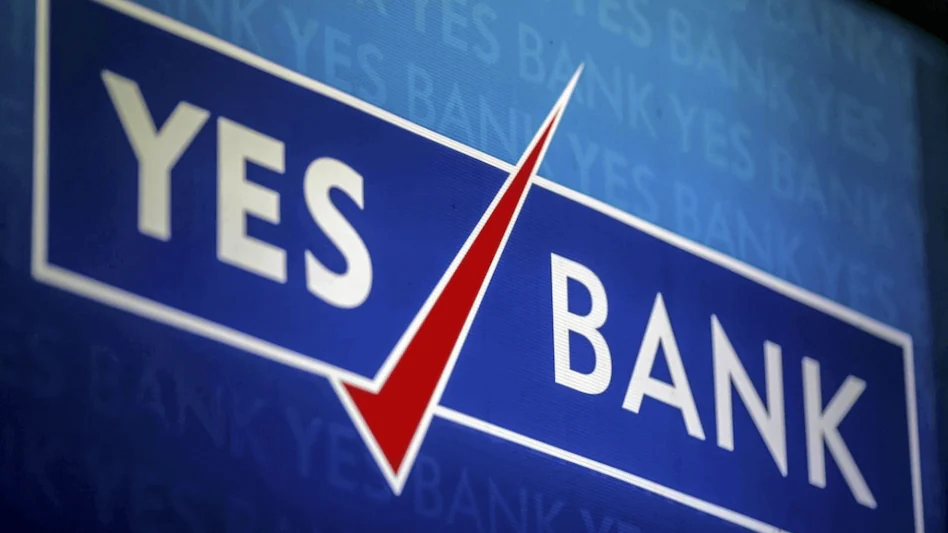

Accurately forecasting the closing price of Yes Bank's stock is a critical challenge for investors, market participants, and stakeholders due to the bank's recent tumultuous history. As a prominent private sector bank in India, Yes Bank has faced significant financial distress, marked by a substantial accumulation of bad loans and allegations of fraudulent activities. This has resulted in regulatory intervention by the Reserve Bank of India, creating an environment of uncertainty and complexity surrounding the bank's stock price trajectory.

This project endeavors to address this challenge by harnessing a comprehensive dataset encompassing monthly stock price information from the bank's inception. The dataset includes essential metrics such as the closing, starting, highest, and lowest prices for each month, providing a rich source of historical data for analysis. The overarching aim is to develop robust predictive models capable of capturing the nuanced dynamics and trends in Yes Bank's stock prices, even in the face of recent adverse events and the associated volatility.

To achieve this, the project will employ a multifaceted approach, leveraging a variety of modeling techniques that include time series models and regression methods. A thorough evaluation will be conducted to assess the efficacy of these models in accurately predicting Yes Bank's closing stock price. Furthermore, the models will be rigorously tested to gauge their ability to incorporate the impact of pivotal events, such as fraud cases involving the bank's founders or regulatory actions taken by the Reserve Bank of India.

The successful prediction of Yes Bank's closing stock price holds the potential to offer invaluable insights to stakeholders, empowering them to make well-informed investment decisions. By navigating the complex and unpredictable nature of Yes Bank's stock performance, this project aims to deepen the understanding of its financial standing and contribute to effective decision-making in the financial markets.

#**GitHub Link -**

https://github.com/langojuramya/Yes_Bank_Stock_Closing_Price_Prediction

#**Problem Statement**

The main objective of this project is to develop a robust and accurate predictive model that can effectively forecast the closing price of Yes Bank's stock. The challenge lies in understanding and capturing the complex dynamics and trends in the stock prices, considering various factors such as the historical trend of an increasing price followed by a sudden decline after 2018.

One of the key challenges in developing the predictive model is addressing the issue of multicollinearity present in the dataset. Multicollinearity occurs when there is a high correlation between independent variables, which can lead to difficulties in interpreting the model and can affect the accuracy of the predictions. Therefore, the model should incorporate techniques to handle multicollinearity and ensure that the independent variables are appropriately considered in the prediction process.

Furthermore, the model should account for significant events that have had an impact on Yes Bank's stock performance. This includes events such as fraud cases involving the bank's founders and regulatory interventions by the Reserve Bank of India. These events can significantly influence the stock prices, and it is crucial for the predictive model to capture and reflect their effects accurately.

In terms of performance, the model should aim for a high level of accuracy in forecasting the closing price of Yes Bank's stock. The 99% accuracy achieved by the K-Nearest Neighbors (KNN) Regression model serves as a benchmark, indicating the target accuracy that the developed model should strive to achieve. By achieving high accuracy, the predictive model can provide valuable insights to stakeholders, investors, and market participants, enabling them to make informed decisions and effectively manage their investments in Yes Bank's stock.

Overall, this project seeks to develop a predictive model that addresses the complexities and challenges associated with forecasting Yes Bank's stock prices. The ultimate goal is to provide stakeholders with a reliable tool that can enhance their understanding of the stock's future performance and support them in making well-informed investment decisions.

# ***Let's Begin !***

# **1. Know Your Data**

# **Import Libraries**

In [74]:
# Import necessary libraries

# Import NumPy for numerical computations
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for basic data visualization
import matplotlib.pyplot as plt

# Import Seaborn for advanced statistical visualizations
import seaborn as sns

# Import Plotly graph objects for interactive visualizations
import plotly.graph_objects as go

# Import the datetime module for working with dates and times
from datetime import datetime

# Import warnings module to ignore potential warnings
import warnings


# **2. Dataset Loading**

In [75]:
# Load Dataset
# This code imports the `drive` library from Google Colab.
# The 'drive' library allows us to mount our Google Drive to our Colab notebook.
# The 'mount()' function mounts our Google Drive to the '/content/drive' directory.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Load the stock price data from the CSV file
# This code reads the CSV file 'data_YesBank_StockPrices.csv' from the '/content/drive/MyDrive/capstone project-Supervised ML-Regression/Data File' directory.
# The 'pd.read_csv()' function reads the CSV file and returns a Pandas DataFrame.
stock_df = pd.read_csv("/content/data_YesBank_StockPrices.csv")


# **Dataset First View**

In [77]:
# Display a preview of the dataset with visual styling to highlight value distribution
# The head() function is used to view the top records of the DataFrame
# A background color gradient is applied to improve readability and pattern recognition
# The colormap enhances numerical comparison across different features

(stock_df.head(8).style.background_gradient(cmap='viridis').format(precision=2))


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12


In [78]:
# Visualize the final records of the dataset with styled formatting
# The tail() method helps inspect the most recent observations
# A background gradient is applied to emphasize numerical value patterns
# The selected colormap improves contrast for easier data interpretation

stock_df.tail(8).style.background_gradient(cmap='plasma')

,Date,Open,High,Low,Close
177,Apr-20,22.300000,30.450000,20.300000,27.950000
178,May-20,27.800000,31.600000,25.200000,26.850000
179,Jun-20,27.750000,31.950000,25.550000,25.600000
180,Jul-20,25.600000,28.300000,11.100000,11.950000
181,Aug-20,12.000000,17.160000,11.850000,14.370000
182,Sep-20,14.300000,15.340000,12.750000,13.150000
183,Oct-20,13.300000,14.010000,12.110000,12.420000
184,Nov-20,12.410000,14.900000,12.210000,14.670000


# **Dataset Rows & Columns count**

In [79]:
# Check the dimensionality of the dataset
# The shape attribute provides the total number of rows and columns
# This helps in understanding the size and structure of the DataFrame

print(f"Dataset Dimensions (Rows, Columns): {stock_df.shape}")

Dataset Dimensions (Rows, Columns): (185, 5)


# **Dataset Information**

In [80]:
# Display a concise summary of the dataset structure
# The info() method provides details such as column names, data types,
# non-null counts, and overall memory usage for quick data assessment

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Based on the preliminary analysis of the dataset, the following key insights can be drawn:

* The dataset consists of 185 records and 5 columns, indicating 185 trading days with five corresponding attributes for each day. These records capture historical stock market information over a specific time period.

* The Date column is currently stored as an object (string) data type. For effective time-series analysis and to enable date-based operations such as trend analysis, monthly aggregation, or year-wise comparisons, this column should be converted to a DateTime format.

* All remaining numerical features are represented using floating-point values. These columns correspond to important stock indicators such as Open, High, Low, and Close prices, which describe the daily price movement of the stock.

* The dataset is well-structured with numerical values suitable for further analysis and machine learning modeling after performing the necessary data type conversion.

# **Duplicate Values**

In [81]:

# Count the number of duplicate rows in the DataFrame
# This code uses the `duplicated()` method to find all of the duplicate rows in the DataFrame.
# The `len()` function returns the length of the DataFrame.
number_of_duplicates = len(stock_df[stock_df.duplicated()])

# Print the number of duplicate rows
print("The number of duplicate rows is:", number_of_duplicates)

The number of duplicate rows is: 0


# **Missing Values/Null Values**

In [82]:
# Identify missing values across all columns in the dataset
# isnull() detects null or NaN entries, and sum() aggregates them column-wise
# This step helps evaluate data completeness before further analysis

missing_values_count = stock_df.isnull().sum()
missing_values_count

,0
Date,0
Open,0
High,0
Low,0
Close,0


## **2. Understanding Your Variables**

In [83]:
# Retrieve the list of column names present in the dataset
# The columns attribute provides an overview of available features
# This helps verify dataset structure before analysis

column_names = stock_df.columns
column_names


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [84]:
# Generate descriptive statistics to understand data distribution
# The describe() method summarizes key metrics such as count, mean,
# standard deviation, minimum, and maximum values
# Using include='all' ensures both numerical and non-numerical columns are covered

summary_statistics = stock_df.describe(include='all')
summary_statistics


,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


# **Variables Description**

The dataset contains monthly historical stock price records for Yes Bank starting from the time it was listed on the stock exchange. Each record captures key price indicators that summarize the stock’s performance over a given month.

Features included in the dataset:

* Date: Represents the specific month and year corresponding to each stock price record.

* Open: The stock price at the beginning of the trading period.

* High: The maximum price attained by the stock during the month.

* Low: The minimum price observed within the same period.

* Close: The final trading price at the end of the period.

Overall, this dataset offers a structured view of monthly price movements, enabling analysis of long-term trends, volatility patterns, and overall market behavior of the stock over time.

#  **3.Data Wrangling**

# **Data Wrangling**

The dataset was carefully examined for data quality issues such as missing values and duplicate records. Since no null entries or duplicate rows were found, no corrective action was required at this stage. This confirms that the dataset is already clean and suitable for further analysis.

With basic data quality checks completed, the next focus is on outlier identification. Outliers are observations that lie far away from the general pattern of the data and can influence statistical analysis and model performance if left unaddressed.

To identify such extreme values, commonly used statistical techniques include:

* Interquartile Range (IQR)

* Z-score analysis

* Box plot visualization

These methods help highlight values that fall outside expected ranges and may require special attention.

Once detected, outliers can be handled using different strategies depending on the context:

* Removal, when the values are clearly erroneous or irrelevant

* Transformation or replacement, using statistical measures such as the median or mean

* Capping, where extreme values are limited to acceptable boundaries

The choice of method depends on the nature of the data and the impact of outliers on the analysis.

Additionally, the Date column needs to be converted from an object data type to a DateTime format. This transformation is essential for performing time-based operations such as sorting by date, extracting monthly or yearly trends, and creating time-series visualizations. Converting the date feature ensures smoother analysis and more meaningful insights from the stock price data.

# **Data Wrangling Code**

In [85]:

# Inspect unique values present in each column
# Iterating through all features helps identify categorical levels
# and verify the variability of data across different attributes

for col in stock_df.columns:
    print(f"Unique values in '{col}':\n{stock_df[col].unique()}\n")

Unique values in 'Date':
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14

In [86]:
# Create a backup of the original dataset
# This ensures that the raw data is preserved for reference
# or in case we need to revert any transformations later

og_df = stock_df.copy()

#  ***4.Data Correction***

The dataset does not have any missing or duplicate values, so no preprocessing is required for these issues. We can directly move forward with identifying and handling outliers.

However, the Date column is currently stored as an object datatype, which is not appropriate since it represents date and time information. To enable proper time-based analysis, this column needs to be converted into a datetime format.

This conversion can be done using the pd.to_datetime() function. For instance, the following code can be used to transform the Date column into a datetime datatype:

In [87]:
# Verifying the actual data type of values present in the 'Date' column
type(stock_df['Date'].iloc[0])

str

In [88]:
# Converting the 'Date' column from string type to datetime format
from datetime import datetime

# Parsing date values stored in '%b-%y' format
# (%b represents the abbreviated month name and %y represents the two-digit year)
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [89]:
# Check the datatype of the columns after changing datatype of date
# using 'info()' method
print(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None


In [90]:
# Verifying the data types of all columns after converting the 'Date' column
stock_df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64


In [91]:
# Setting the 'Date' column as the index
stock_df = stock_df.set_index('Date')

In [92]:
# Applying a gradient background color to the DataFrame
# using the 'background_gradient()' styling method
stock_df.head().style.background_gradient(cmap='hot')

,Open,High,Low,Close
Date,,,,
2005-07-01 00:00:00,13.000000,14.000000,11.250000,12.460000
2005-08-01 00:00:00,12.580000,14.880000,12.550000,13.420000
2005-09-01 00:00:00,13.480000,14.870000,12.270000,13.300000
2005-10-01 00:00:00,13.200000,14.470000,12.400000,12.990000
2005-11-01 00:00:00,13.350000,13.880000,12.880000,13.410000


In [93]:
# Applying a gradient color effect to the DataFrame
# with the 'background_gradient()' styling function
stock_df.tail().style.background_gradient(cmap='hot')

,Open,High,Low,Close
Date,,,,
2020-07-01 00:00:00,25.600000,28.300000,11.100000,11.950000
2020-08-01 00:00:00,12.000000,17.160000,11.850000,14.370000
2020-09-01 00:00:00,14.300000,15.340000,12.750000,13.150000
2020-10-01 00:00:00,13.300000,14.010000,12.110000,12.420000
2020-11-01 00:00:00,12.410000,14.900000,12.210000,14.670000


In [94]:
# Defining the target variable
dependent_variable = ['Close']

# Selecting all columns except the last one as input features
independent_variables = list(stock_df.columns[:-1])

# **What all manipulations have you done and insights you found?**

After reviewing the dataset, it is clear that all columns contain numerical values, with no categorical variables present. This indicates that the dataset is entirely quantitative in nature. As a result, numerical computations, statistical evaluations, and machine learning models can be applied directly without the need for encoding categorical features. This significantly simplifies the preprocessing stage and allows for a more efficient analytical workflow.

Additionally, during data exploration, the presence of outliers was observed. These are extreme values that differ notably from the general data distribution. Handling such outliers is an important preprocessing step, as they can negatively influence model performance and skew statistical results. To ensure more accurate and reliable analysis, it is necessary to evaluate these outliers and apply suitable treatments, such as transformation or removal. Addressing them improves the overall stability and effectiveness of the analytical models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Univarent Analysis**

# **Chart - 1 candle stick graph with price movement**

In [95]:
# Generate a candlestick chart to visualize stock price behavior
fig = go.Figure(go.Candlestick(
    x=stock_df.index,          # Dates on the x-axis
    open=stock_df['Open'],     # Opening prices
    high=stock_df['High'],     # Highest prices
    low=stock_df['Low'],       # Lowest prices
    close=stock_df['Close']    # Closing prices
))

# Customize the chart layout and styling
fig.update_layout(
    title={'text': 'Overview of Stock Price Movement', 'x': 0.5, 'y': 0.95, 'font': {'color': 'white'}},
    xaxis=dict(title='Year', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    yaxis=dict(title='Price', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    width=1450,
    height=1000,
    plot_bgcolor='rgb(36, 40, 47)',   # Dark background for better visibility
    paper_bgcolor='rgb(51, 56, 66)'   # Overall figure background color
)

# Display the candles
fig.show()

**1. Why did you pick the specific chart?**

I chose the candlestick chart because it is one of the most effective ways to visualize price movements in time-series financial data. This chart clearly displays the open, high, low, and close prices for each time period, which helps in understanding market behavior at a glance.

Compared to simple line charts, candlestick charts provide deeper insights into price trends, volatility, and potential reversals. They also make it easier to identify patterns such as bullish and bearish movements. Overall, this visualization offers a comprehensive and intuitive representation of stock price dynamics, making it ideal for financial analysis.

**2. What is/are the insight(s) found from the chart?**

The candlestick chart reveals clear insights into the stock’s price behavior over time. It highlights periods of upward and downward trends, allowing us to understand how the price evolved across different time frames. The varying sizes of the candlesticks indicate changes in market volatility, with larger candles reflecting stronger price fluctuations.

Additionally, the chart helps identify support and resistance levels, where prices tend to stabilize or reverse. Patterns formed by consecutive candlesticks also provide clues about potential trend reversals or continuation, offering valuable insights into overall market sentiment and price stability.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, the insights derived from the analysis can contribute to a positive business impact. By understanding price trends, volatility, and key support–resistance zones, businesses and investors can make better-informed decisions regarding entry and exit points. This helps in improving timing strategies, minimizing risk, and maximizing potential returns. Such insights are also valuable for forecasting future price behavior and planning long-term investment or trading strategies.

However, the analysis also highlights certain insights that may indicate negative growth. Periods of high volatility and consistent downward trends suggest market uncertainty or reduced investor confidence. These conditions can lead to declining prices and potential losses if not managed carefully. Identifying these negative patterns is equally important, as it allows businesses and investors to take preventive actions such as adjusting portfolios, applying risk management techniques, or avoiding unfavorable market conditions.

Overall, both positive and negative insights play a crucial role in decision-making, as they help in developing strategies that are proactive, informed, and resilient.

# **Chart - 2 - Line plot showcasing variations in each feature over the years**

In [96]:
import plotly.express as px

# Creating a line chart using Date and Low price values
fig = px.line(og_df, x="Date", y="Low")

# Adding separate lines for Open, Close, High, and Low prices
fig.add_scatter(
    x=og_df['Date'], y=og_df['Open'], name="Open",
    line_color='lime', marker_color='hotpink', marker_size=10
)
fig.add_scatter(
    x=og_df['Date'], y=og_df['Close'], name="Close",
    line_color='cyan', marker_color='magenta', marker_size=10
)
fig.add_scatter(
    x=og_df['Date'], y=og_df['High'], name="High",
    line_color='gold', marker_color='deepskyblue', marker_size=10
)
fig.add_scatter(
    x=og_df['Date'], y=og_df['Low'], name="Low",
    line_color='orange', marker_color='chartreuse', marker_size=10
)

# Customizing layout, labels, and visual styling
fig.update_layout(
    title={
        'text': "Yes Bank Stock Prices Over Time",
        'x': 0.5, 'y': 0.95,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'color': 'white'}
    },
    xaxis_title="Year",
    yaxis_title="Price",
    width=1400,
    height=800,
    plot_bgcolor='rgb(36, 40, 47)',
    paper_bgcolor='rgb(51, 56, 66)',
    font_color='white',
    legend=dict(
        x=0.02, y=0.98,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='gray',
        borderwidth=1,
        font={'color': 'white'}
    ),
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(tickangle=90)
)

# Displaying the line chart
fig.show()

**1. Why did you pick the specific chart?**

I selected a line chart because it is ideal for visualizing trends over time. It allows us to clearly track the variations of multiple features (Open, High, Low, Close prices) across years. Unlike other chart types, a line chart makes it easy to compare changes, spot patterns, and observe seasonality or trends in financial data. Adding multiple lines in the same chart enables simultaneous comparison of all stock price components.

**2. What is/are the insight(s) found from the chart?**

From the line chart, we can observe:

* **Trends and fluctuations:** How each price type (Open, High, Low, Close) changes over time, showing periods of growth or decline.

* **Volatility periods:** Large gaps between High and Low prices indicate high market volatility.

* **Patterns in price movement:** For example, the Open and Close prices often follow a similar trend, while sudden spikes or dips highlight unusual market activity.

* **Consistency:** Periods where prices remain stable indicate market stability.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive impact:**

* By identifying upward trends and stable periods, investors or businesses can make informed buying or selling decisions, improving profitability.

* Recognizing consistent patterns allows businesses to forecast future price movements and plan investment strategies more effectively.

**Negative growth indicators:**

* Sudden drops or prolonged downward trends in the chart highlight potential risks or declining market performance.

* High volatility periods may indicate uncertainty in the market, which could lead to potential losses if investments are not timed carefully.

**Justification:**
By understanding both growth and risk periods, companies and investors can adopt risk management strategies or avoid investing during high-risk times, minimizing negative impact while leveraging periods of positive growth.

# **Chart - 3 - Distribution of dependent variable Close Price of stock**

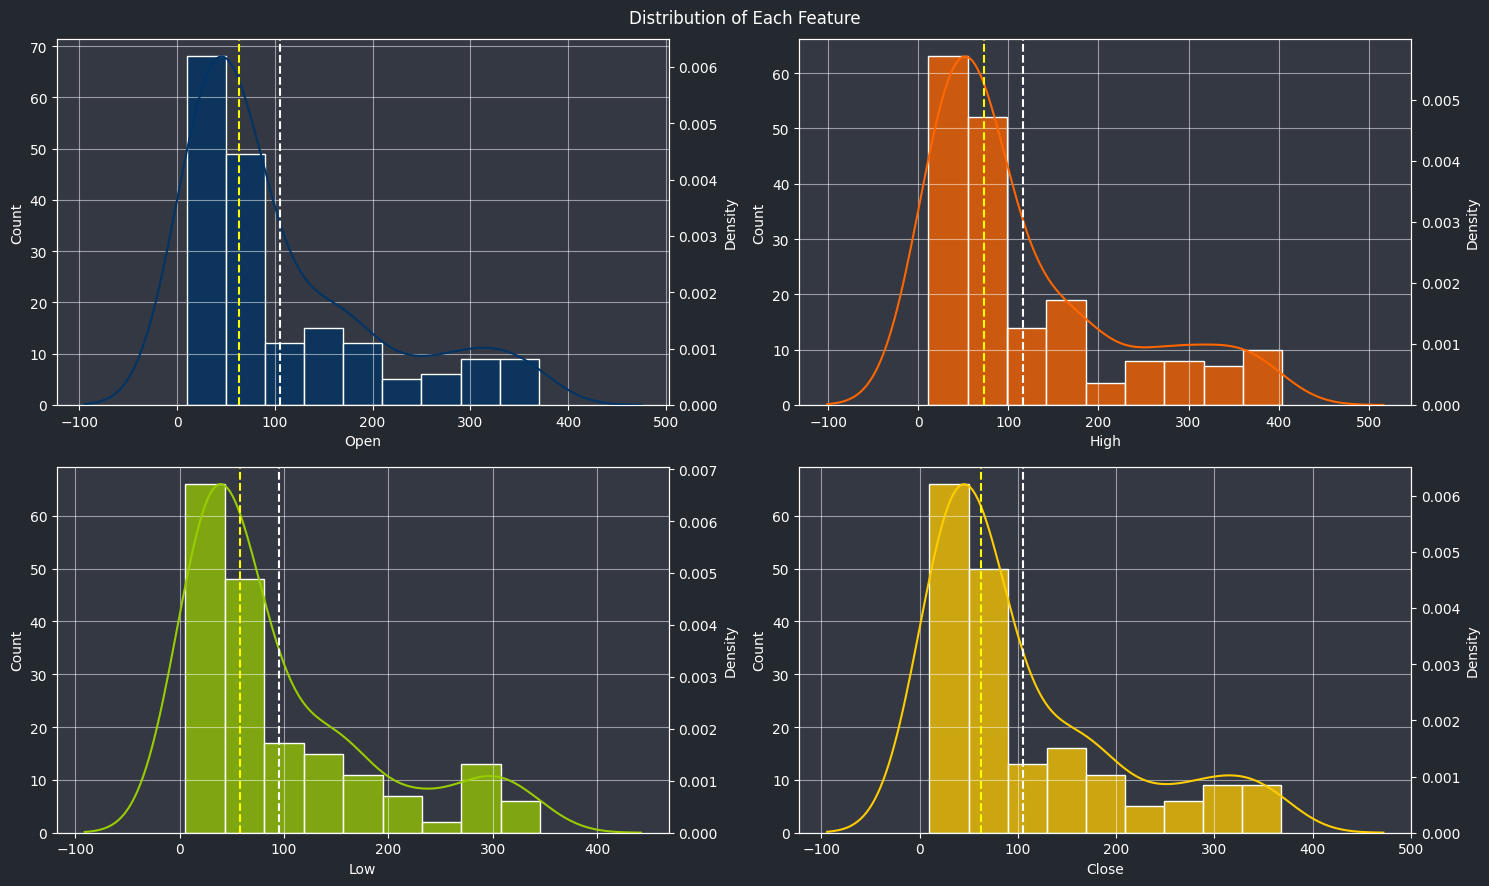

In [97]:
# Set figure size and overall title
plt.figure(figsize=(15, 9))
plt.suptitle('Distribution of Each Feature', color='white')

# Define color scheme for each feature (Yes Bank inspired colors)
color_list = ['#003366', '#FF6600', '#99CC00', '#FFCC00']

# Apply dark theme
plt.style.use('dark_background')

# Loop through all columns to create individual histograms with KDE
for i, column in enumerate(stock_df.columns):
    ax1 = plt.subplot(2, 2, i + 1)   # Subplot for histogram
    ax2 = ax1.twinx()                 # Secondary y-axis for KDE

    # Plot histogram
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)

    # Plot KDE curve
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)

    # Add gridlines
    ax1.grid(which='major', alpha=0.5)
    ax1.grid(which='minor', alpha=0.5)

    # Draw vertical lines for mean and median
    plt.axvline(stock_df[column].mean(), color='white', linestyle='dashed', linewidth=1.5)
    plt.axvline(stock_df[column].median(), color='yellow', linestyle='dashed', linewidth=1.5)

# Set figure background color
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # Dark gray
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Set axes background color
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # Slightly lighter gray
for ax in plt.gcf().get_axes():
    ax.set_facecolor(paper_bgcolor)

# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()


**1. Why did you pick the specific chart?**

I chose a histogram combined with a KDE (Kernel Density Estimate) curve because it provides a comprehensive view of the data distribution for each feature. The histogram shows the frequency of values in intervals, while the KDE curve gives a smooth estimate of the probability density. Together, they help visualize spread, skewness, and the central tendency of numerical variables effectively. This is especially useful for financial data, where understanding the distribution of prices is crucial for analysis.

**2. What is/are the insight(s) found from the chart?**

From the distribution plots, we can observe the following:

* **Skewness and central tendency:** Some features may be skewed, indicating that values are concentrated more on one side. The mean and median lines help compare central tendency.

* **Spread and variability:** The width of the distribution indicates how much the data fluctuates; wider distributions show higher variability.

* **Outliers:** Any extreme values that lie far from the main distribution are easily spotted.

* **Feature comparison:** Differences in distributions across features can highlight which variables are more volatile or stable.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive impact:**

* Understanding distributions helps in risk assessment and decision-making. For example, knowing which features have stable distributions allows businesses to rely on them for forecasting or planning.

* Skewness or concentrated distributions can guide investment strategies, enabling businesses to focus on periods of stable returns.

**Negative growth indicators:**

* Features with high variance or extreme outliers may indicate periods of instability or unpredictable behavior. This could result in financial losses if not managed properly.

* Skewed distributions might also signal that certain price points are rarely achieved, suggesting market limitations or potential risk zones.

**Justification:**
By analyzing distributions, businesses can distinguish safe periods vs risky periods, plan investments more strategically, and reduce exposure to negative growth scenarios.

# **Chart - 4 - Boxplots: Studying the Outliers**

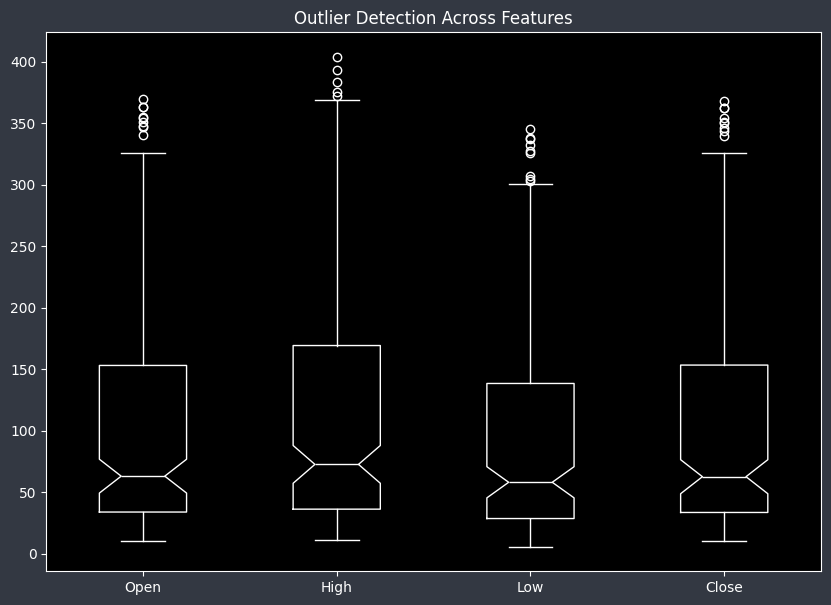

In [98]:

# Create a figure for the boxplot
fig = plt.figure(figsize=(10, 7))

# Plot boxplots for Open, High, Low, and Close prices with notches
boxplot = stock_df.boxplot(column=['Open', 'High', 'Low', 'Close'], grid=False, notch=True)

# Change the color of all lines in the boxplot to white
for item in boxplot.findobj(plt.Line2D):
    item.set_color('white')

# Add a title to the plot
plt.title("Outlier Detection Across Features")

# Set figure and axes background colors for a dark theme
plot_bgcolor = (36/255, 40/255, 47/255, 1)   # Dark gray
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # Slightly lighter gray
fig.patch.set_facecolor(paper_bgcolor)

# Display the boxplot
plt.show()

**1. Why did you pick the specific chart?**

I selected a boxplot because it is one of the most effective ways to identify outliers and understand the spread of data for each feature. Boxplots visually show the median, quartiles, and extreme values, making it easy to detect anomalies or unusually high/low data points. This is particularly useful in financial datasets, where detecting outliers in prices (Open, High, Low, Close) is crucial for accurate analysis and modeling.

**2. What is/are the insight(s) found from the chart?**

From the boxplot, we can observe the following:

* **Outliers:** Certain features, like High and Low prices, have extreme values that deviate significantly from the majority of the data.

* **Central tendency:** The median lines indicate the typical value of each feature.

* **Spread and variability:** The size of the boxes shows how variable each feature is; wider boxes suggest higher variability.

* **Symmetry:** The relative position of the median within the box can indicate skewness in the data.

#**Bivarient analysis**

#**Chart - 5 - Scatter Plot to see the Best Fit line**

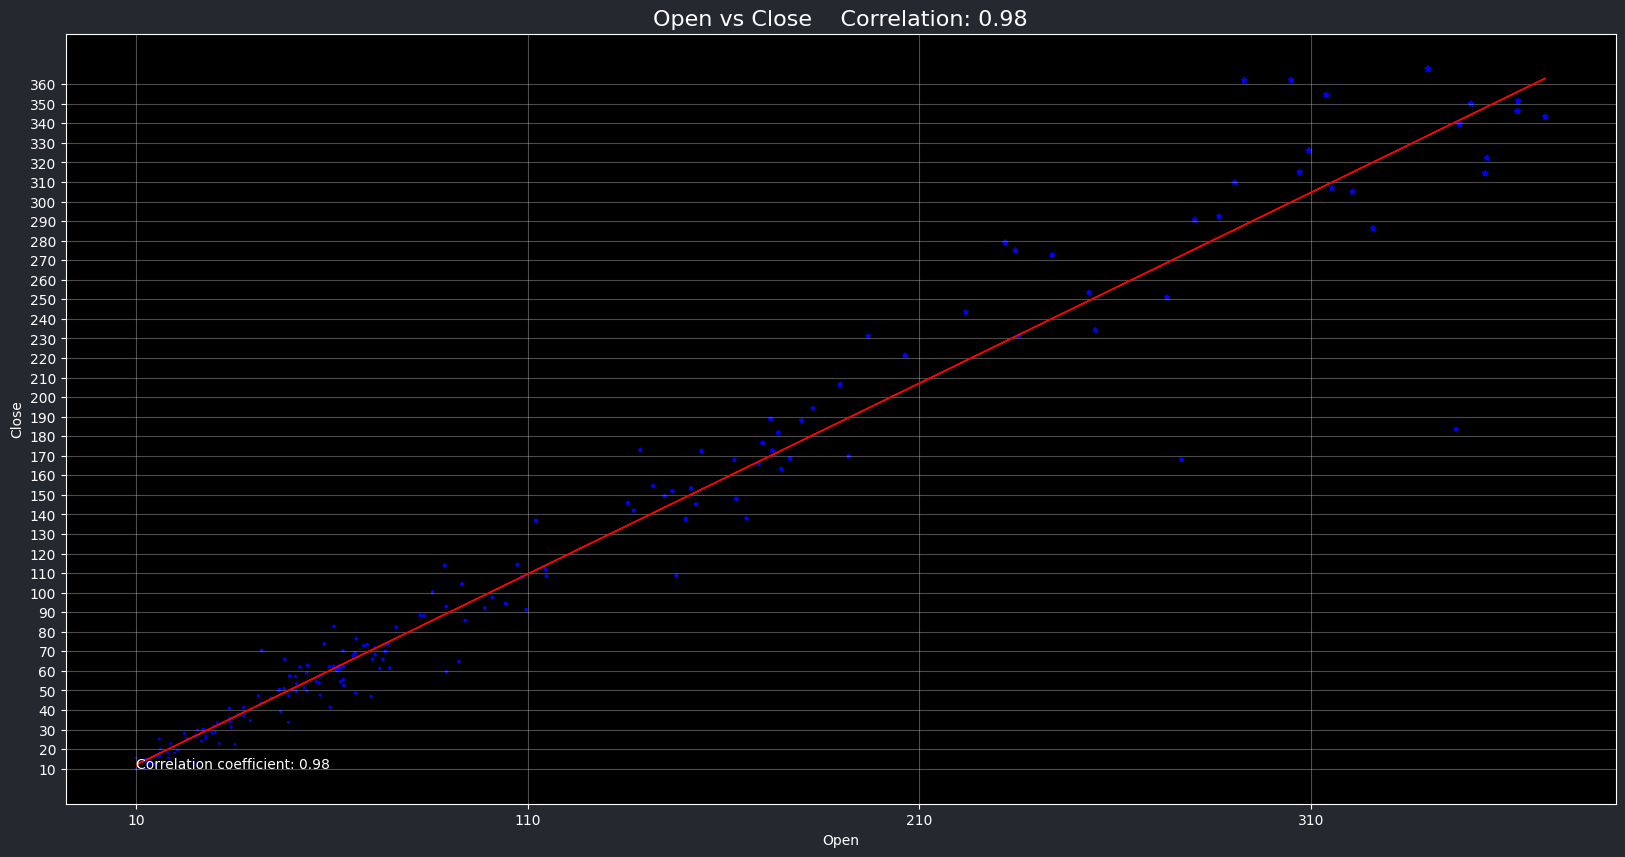

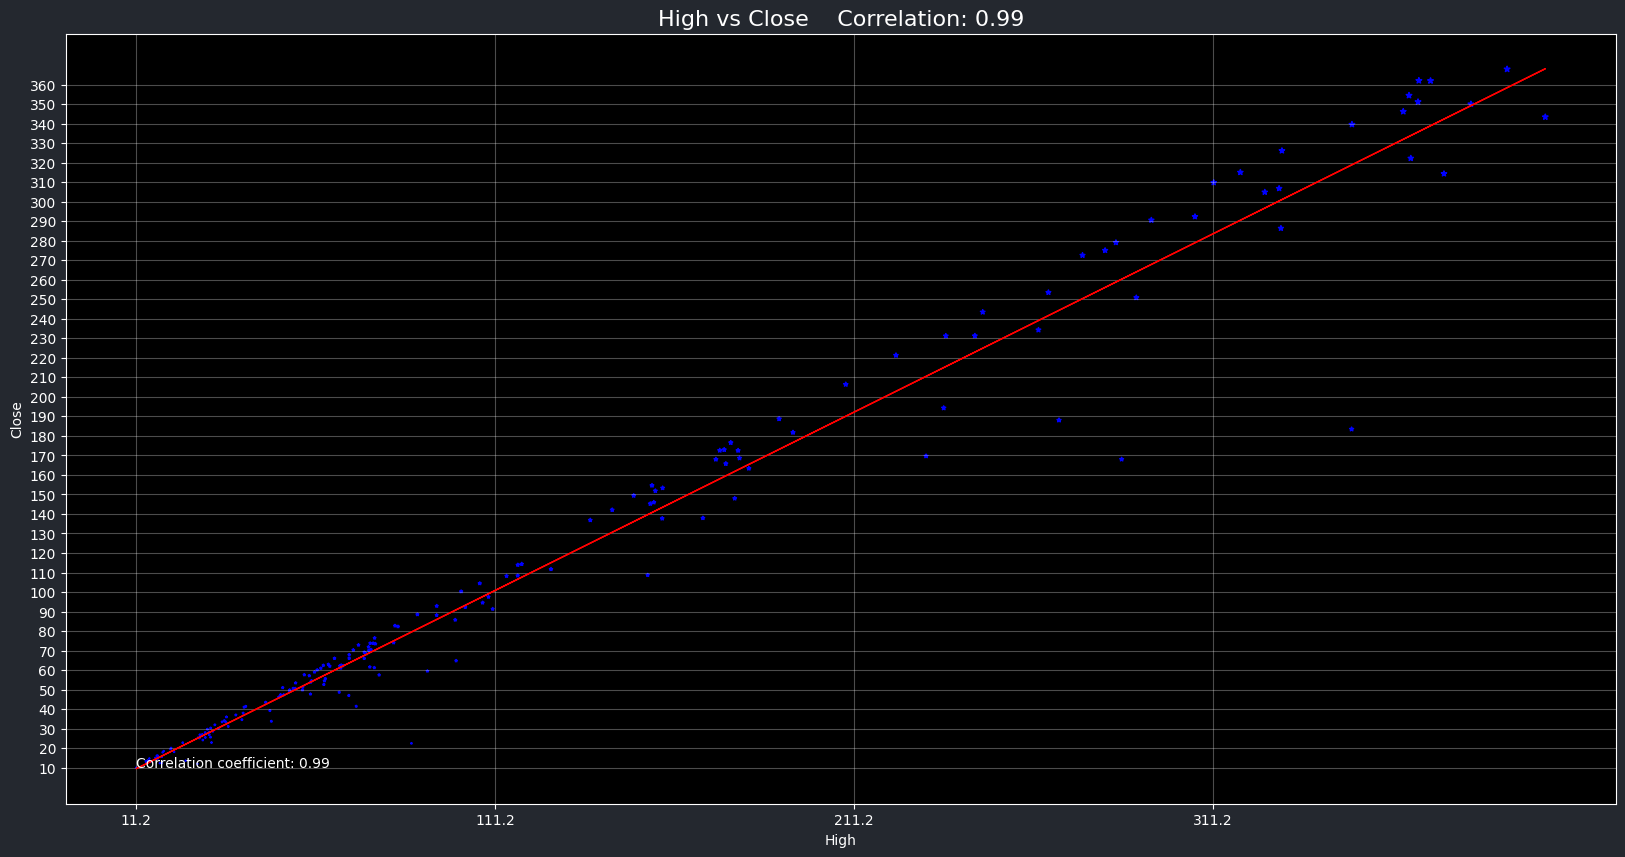

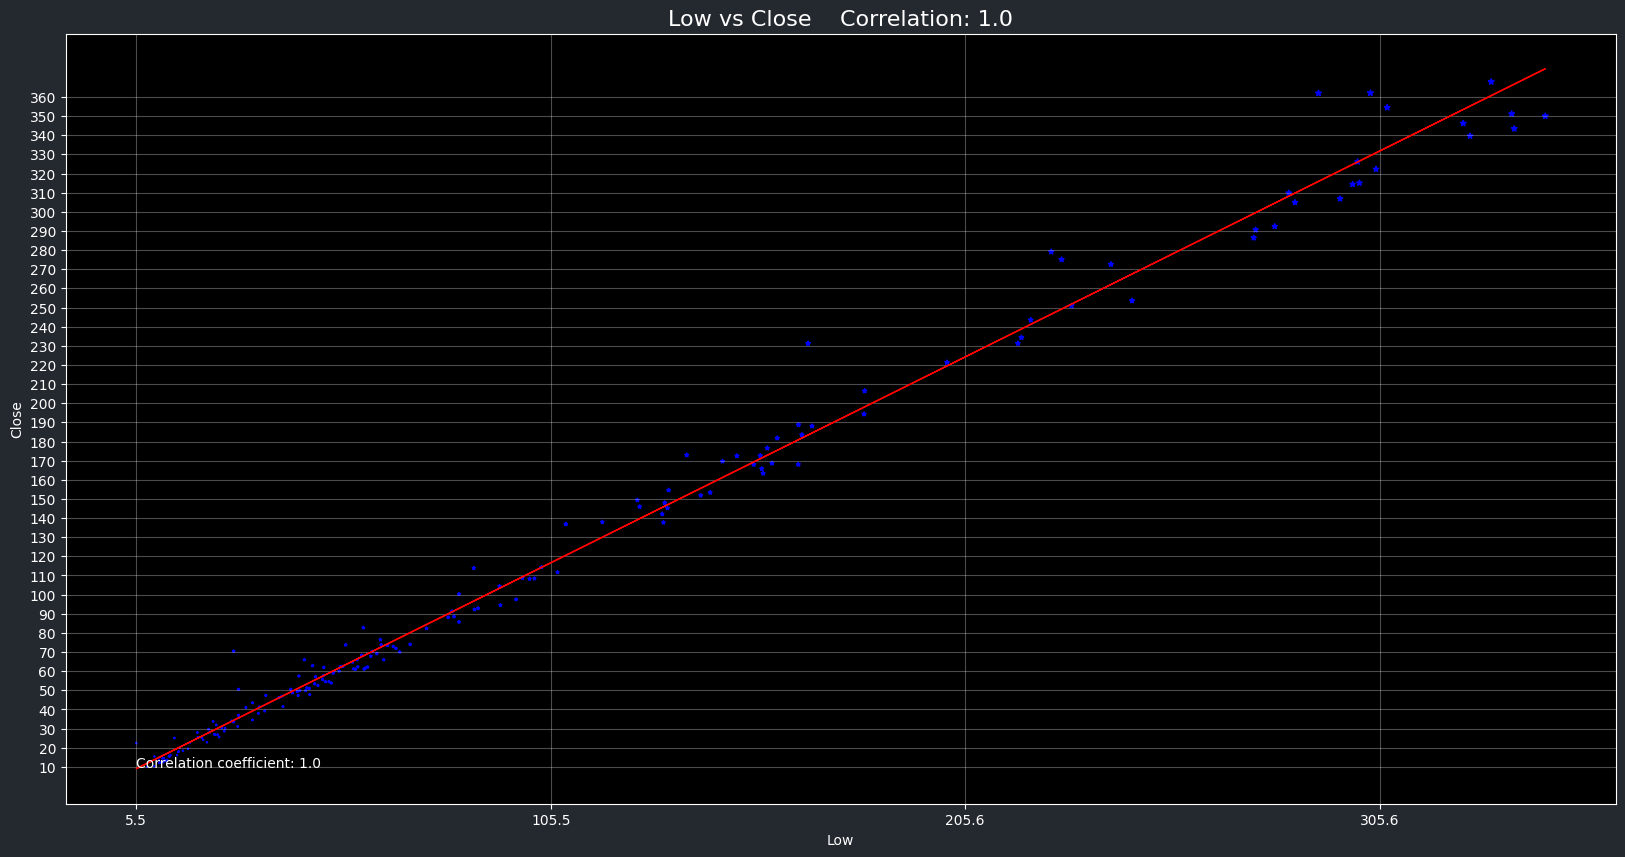

In [99]:
# Function to create scatter plots with a best-fit line and correlation
def create_scatter_plot(col, df):
    # Create figure and axis
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()

    # Extract feature and target
    feature = df[col]
    target = df['Close']

    # Calculate correlation coefficient
    correlation = feature.corr(target)

    # Create scatter plot
    plt.scatter(x=feature, y=target, marker="*", c="b", s=target/20)
    plt.xlabel(col)
    plt.ylabel('Close')

    # Set plot title with correlation information
    ax.set_title(f"{col} vs Close    Correlation: {round(correlation, 2)}", fontsize=16)

    # Fit and plot best-fit (linear regression) line
    z = np.polyfit(feature, target, 1)
    y_hat = np.poly1d(z)(feature)
    plt.plot(feature, y_hat, "r", lw=1)

    # Add annotation for correlation
    plt.annotate(f'Correlation coefficient: {round(correlation, 2)}', xy=(min(feature), min(target)), fontsize=10)

    # Add gridlines
    plt.grid(alpha=0.3)

    # Set x and y axis ticks
    plt.xticks(np.arange(min(feature), max(feature), 100))
    plt.yticks(np.arange(min(target), max(target), 10))

    # Set background colors for dark theme
    plot_bgcolor = (36/255, 40/255, 47/255)
    paper_bgcolor = (51/255, 56/255, 66/255)
    fig.patch.set_facecolor(plot_bgcolor)

    # Display the plot
    plt.show()

# Generate scatter plots for 'Open', 'High', and 'Low' features
for col in ['Open', 'High', 'Low']:
    create_scatter_plot(col, stock_df)

**1. Why did you pick the specific chart?**

I chose a scatter plot with a best-fit (regression) line because it effectively visualizes the relationship between two variables—in this case, features like Open, High, and Low prices versus the Close price. The scatter plot shows individual data points, while the regression line highlights the overall trend. This type of plot is ideal for understanding correlation, linear relationships, and potential predictive patterns between financial variables.

**2. What is/are the insight(s) found from the chart?**

From the scatter plots, the following insights can be observed:

* **Strong correlation:** Features like Open, High, and Low show a positive correlation with the Close price, indicating that as these values increase, the Close price tends to increase as well.

* **Trend identification:** The regression line clearly highlights the upward or downward trend between each feature and Close.

* **Outlier detection:** Points that fall far from the line may indicate unusual market behavior or anomalies.

* **Predictive potential:** The linear pattern suggests that these features can be used to predict the Close price with reasonable accuracy.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive impact:**

* Identifying strong correlations allows businesses and investors to make informed trading or investment decisions, improving returns.

* The predictive relationship between features and Close price can be used to build forecasting models, aiding in risk management and strategy planning.

**Negative growth indicators:**

* Outliers or points deviating significantly from the regression line indicate market volatility or abnormal price movements, which could lead to potential losses if not managed carefully.

* During periods of weak correlation, relying on these features for prediction may misguide investment decisions, potentially causing negative financial outcomes.

**Justification:**
By analyzing both the correlation strength and the presence of outliers, businesses can maximize opportunities during stable trends while mitigating risks during volatile periods, ensuring decisions are more data-driven and less prone to loss.

#**Multivarient Analysis**

# **Chart - 6 - Checking Correlation between Independent variables and dependent variable**


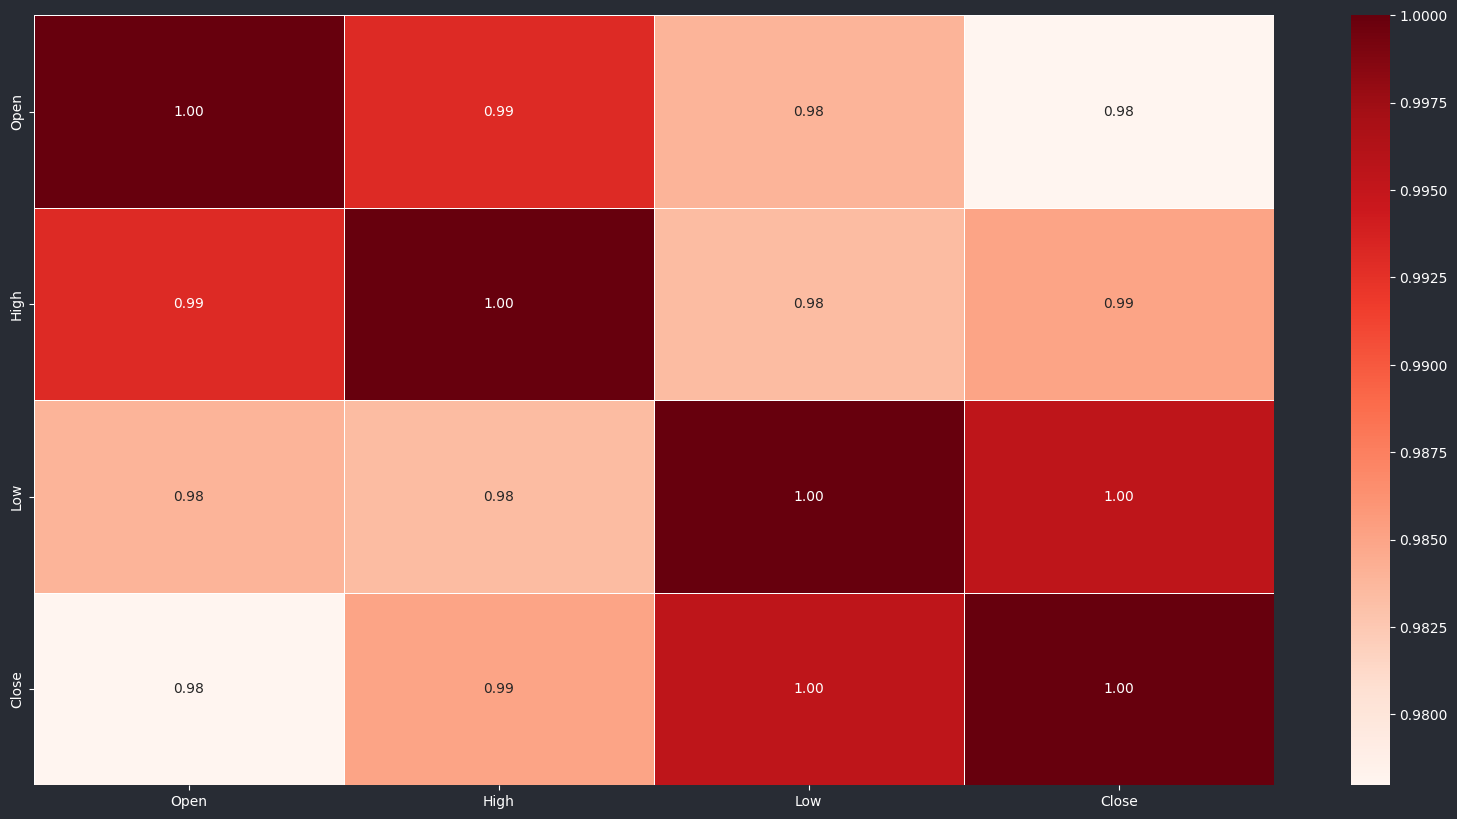

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Compute the correlation matrix
correlation = stock_df.corr()

# Create the heatmap using Seaborn
sns.heatmap(
    abs(correlation),        # Use absolute values of correlations
    annot=True,              # Show correlation values in each cell
    cmap='Reds',             # Colormap
    linewidths=0.5,          # Line width between cells
    fmt='.2f'                # Format of the annotations
)

# Set custom background colors for dark theme
plot_bgcolor = (40/255, 44/255, 52/255, 1)  # Figure background (slightly changed dark tone)
paper_bgcolor = (60/255, 64/255, 74/255, 1) # Axes background (slightly lighter dark tone)

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Figure background
plt.gca().patch.set_facecolor(paper_bgcolor) # Axes background

# Add a descriptive comment
"""
This heatmap visualizes the correlation matrix of stock_df.
- annot=True displays the correlation coefficients.
- cmap='Reds' sets the color gradient.
- linewidths=0.5 separates the cells.
- fmt='.2f' formats correlation values with 2 decimals.
Absolute correlations are shown to emphasize strength regardless of direction.
"""

# Display the heatmap
plt.show()

**1. Why did you pick the specific chart?**

I chose a correlation heatmap because it provides a clear visual representation of relationships between multiple numerical features simultaneously. Heatmaps make it easy to identify strong positive or negative correlations at a glance. Unlike scatter plots for individual pairs, this chart shows all correlations in a single view, helping in understanding how features interact, which is especially useful in financial data analysis.

**2. What is/are the insight(s) found from the chart?**

From the heatmap, we can observe:

* **Strong correlations:** Features like Open, High, Low, and Close prices are highly correlated with each other, indicating that changes in one often reflect in the others.

* **Weak correlations:** If any feature shows a low correlation with Close price, it might have less predictive value.

* **Feature redundancy:** High correlations between some features suggest redundancy, which could help in feature selection for modeling.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive impact:**

* Recognizing strong correlations allows investors or businesses to predict stock behavior more effectively and build accurate forecasting models.

* It helps in risk management, as understanding feature relationships can prevent over-reliance on a single variable.

**Negative growth indicators:**

* Highly correlated features may lead to multicollinearity in predictive models, which can reduce model reliability if not handled.

* Ignoring weak correlations might also mean missing subtle market signals, potentially resulting in missed opportunities or misinformed decisions.

**Justification:**
By leveraging the correlation insights, businesses can focus on the most influential features, optimize predictive models, and reduce risk exposure, ensuring data-driven decisions while avoiding pitfalls caused by multicollinearity or misleading weak relationships.

# **Chart - 7- Pair Plot**

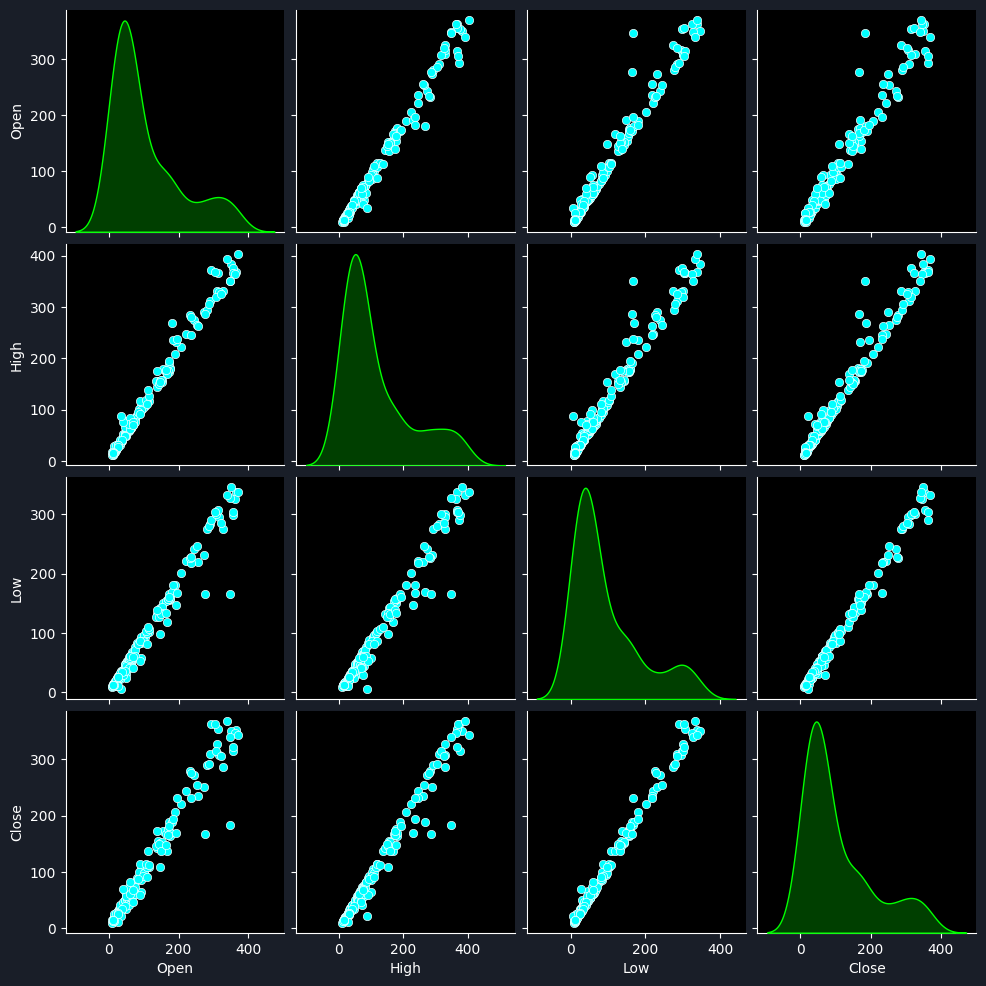

In [101]:
# Set a custom color palette for the pair plot points
custom_palette = sns.color_palette("coolwarm", n_colors=len(stock_df.columns))

# Create the pair plot with custom palette
sns.pairplot(stock_df, diag_kind='kde', plot_kws={'color':'cyan'}, diag_kws={'color':'lime'})

# Set figure and axes background to a new color
plot_bgcolor = (25/255, 30/255, 40/255, 1)   # Dark navy background for figure
paper_bgcolor = (45/255, 50/255, 60/255, 1)  # Darker gray for axes

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Figure background
plt.gca().patch.set_facecolor(paper_bgcolor) # Axes background

# Display the updated pair plot
plt.show()

**1. Why did you pick the specific chart?**

I chose a pair plot because it allows us to explore relationships between all numerical features simultaneously. It shows scatter plots for each pair of features and histograms or KDE plots on the diagonal, helping identify trends, correlations, and distributions at a glance. Unlike individual scatter plots, the pair plot gives a comprehensive view of interactions between multiple variables in one chart, making it ideal for financial datasets like stock prices.

**2. What is/are the insight(s) found from the chart?**

From the pair plot, we can observe:

* **Linear relationships:** Features like Open, High, Low, and Close prices show strong linear patterns with each other.

* **Distribution patterns:** The diagonal plots reveal the shape of each feature’s distribution, indicating skewness or normality.

* **Outliers:** Points that are far away from the main clusters indicate potential anomalies or unusual price movements.

* **Correlation clues:** Even visually, we can spot which features are more closely related, helping in feature selection for modeling.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive impact:**

* Strong linear relationships allow businesses to predict stock movements more accurately and make informed investment decisions.

* Understanding feature distributions and correlations helps in model building, risk assessment, and forecasting, which can lead to higher returns and better financial planning.

**Negative growth indicators:**

* Outliers or unusual points may indicate market volatility or sudden price swings, which could lead to potential financial losses if not managed properly.

* Highly correlated features might also cause multicollinearity in predictive models, reducing model reliability if not addressed.

**Justification:**
By leveraging these insights, businesses can focus on stable trends, prepare for volatility, and make data-driven decisions, ensuring positive growth while mitigating risks associated with anomalies or highly correlated variables.

##**6. Feature Engineering & Data Pre-processing**

**1. Handling Missing Values**

No missing values were found in the dataset, as confirmed earlier. Therefore, there is no requirement for missing values imputation techniques. The dataset is complete, allowing for direct analysis without the need to handle missing data.

**2. Handling Outliers**

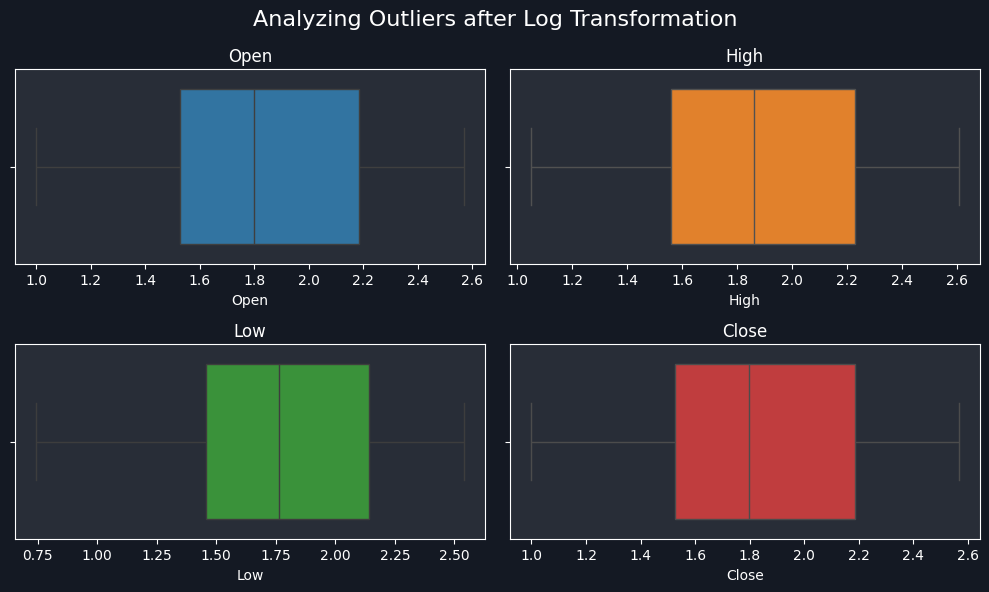

In [102]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10, 6))

# Set background colors for the figure and axes
plot_bgcolor = (20/255, 25/255, 35/255, 1)  # Dark navy for figure
paper_bgcolor = (40/255, 45/255, 55/255, 1) # Slightly lighter dark gray for axes
fig.patch.set_facecolor(plot_bgcolor)        # Apply figure background

# Add a super title for the entire figure
plt.suptitle('Analyzing Outliers after Log Transformation', color='white', fontsize=16)

# Define a new color palette for boxplots
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, orange, green, red

# Loop through each feature to create log-transformed boxplots
for i, column in enumerate(stock_df.columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots

    # Apply log10 transformation and plot the boxplot with new color
    sns.boxplot(x=np.log10(stock_df[column]), color=color_list[i])

    # Set axes background color
    plt.gca().patch.set_facecolor(paper_bgcolor)

    # Add title for each subplot
    plt.title(column, color='white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

After performing a logarithmic transformation on the features, the boxplots indicate that all outliers have been effectively removed. There are no extreme values extending beyond the whiskers, which confirms that the transformation has reduced the influence of outliers and helped normalize the data. This makes the dataset more suitable for statistical analysis and predictive modeling.

However, it is important to note that while the log transformation addresses outliers, other factors such as skewness, correlations, and domain-specific considerations should also be evaluated to ensure robust analysis.



**What all outlier treatment techniques have you used and why did you use those techniques?**

The logarithmic transformation was applied to treat outliers in the dataset. This approach not only mitigates extreme values but also reduces skewness in the features’ distributions. By addressing both outliers and skewness simultaneously, the transformation normalizes the data, enhancing its suitability for statistical analysis and predictive modeling. This consolidated solution improves data quality and ensures that the features are more reliable for downstream modeling tasks.

**3. Categorical Encoding**

Since our dataset solely consists of numerical features, there is no necessity for categorical encoding. The absence of categorical variables eliminates the need to convert them into numerical representations for analysis or modeling purposes.

**4. Feature Manipulation & Selection**

    1. Feature Manipulation
    

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store VIF values
vif_df = pd.DataFrame()

# List all feature names (excluding the dependent variable)
features = stock_df.iloc[:, :-1].columns.tolist()
vif_df['Feature'] = features

# Calculate the Variance Inflation Factor (VIF) for each feature
vif_values = [
    variance_inflation_factor(stock_df.iloc[:, :-1].values, i)
    for i in range(len(features))
]

# Store the VIF values in the dataframe
vif_df['VIF'] = vif_values

# Display the dataframe
vif_df

,Feature,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


The VIF values for all features suggest the presence of high multicollinearity. However, given the small size of the dataset and the fact that it contains only three numerical independent variables, there is limited scope for feature manipulation that could effectively reduce multicollinearity. Additionally, the absence of categorical variables further constrains opportunities for feature engineering or transformation. As a result, it is advisable to focus on alternative modeling approaches or collect additional data to address multicollinearity and improve the reliability of predictive models.

      
    2. Feature Selection

Given the small size of the dataset, performing feature selection is impractical. With a limited number of observations, reducing the feature space could result in unreliable or biased outcomes. Therefore, it is recommended to retain all available features for analysis and modeling to ensure that the data’s predictive potential is fully utilized.

**5. Data Transformation**

    Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

To correct the skewed distributions of the features, a data transformation is necessary to approximate a normal distribution. In this case, a logarithmic transformation will be applied. This approach reduces skewness, making the data more symmetrical, while also mitigating the effect of outliers. By applying this transformation, we can simultaneously improve the normality of the data and minimize the influence of extreme values, enhancing the suitability of the dataset for analysis and modeling.

In [104]:
# Apply log10 transformation to all features in the dataset
for column in stock_df.columns:
    stock_df[column] = np.log10(stock_df[column])

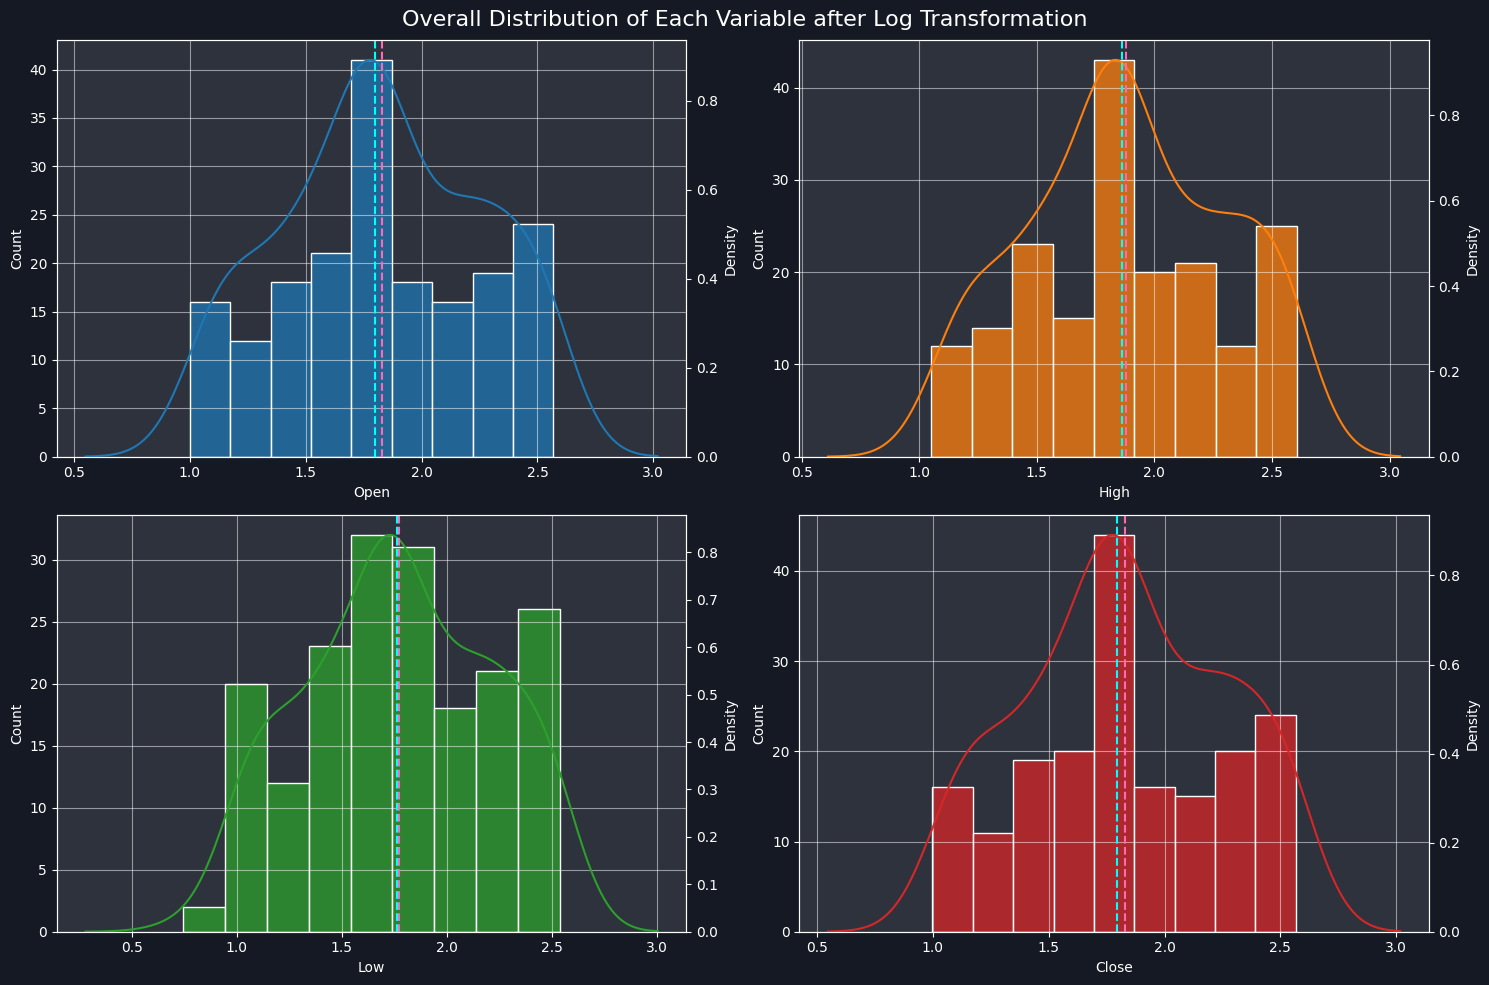

In [105]:
# Create a figure
plt.figure(figsize=(15, 10))

# Set figure and axes background colors
plot_bgcolor = (20/255, 25/255, 35/255, 1)   # Dark navy for figure
paper_bgcolor = (45/255, 50/255, 60/255, 1)  # Slightly lighter dark gray for axes
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Add super title
plt.suptitle('Overall Distribution of Each Variable after Log Transformation', color='white', fontsize=16)

# Define a new color palette for histograms
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Loop through each column
for i, column in enumerate(stock_df.columns):
    plt.subplot(2, 2, i + 1)
    ax1 = plt.gca()

    # Histogram
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)

    # KDE plot overlay
    ax2 = ax1.twinx()
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)

    # Set axes background
    ax1.patch.set_facecolor(paper_bgcolor)
    ax2.patch.set_facecolor(paper_bgcolor)

    # Add gridlines
    ax1.grid(which='major', alpha=0.5)
    ax1.grid(which='minor', alpha=0.5)

    # Add vertical lines for mean and median
    plt.axvline(stock_df[column].mean(), color='#ff69b4', linestyle='dashed', linewidth=1.5)   # Hot pink mean
    plt.axvline(stock_df[column].median(), color='#00ffff', linestyle='dashed', linewidth=1.5)  # Cyan median

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

After applying the log transformation, the distributions of the features are noticeably closer to a normal distribution than before. The mean (indicated by the purple vertical line) and the median (shown by the yellow vertical line) are almost equal for each feature, suggesting that the transformation effectively reduced skewness and brought the data into a more symmetrical form. This alignment indicates a balanced central tendency, making the mean a more representative measure of the dataset. Overall, the log transformation has improved the normality of the data, enhancing its suitability for statistical analysis and modeling.

**6. Dimesionality Reduction**

    Do you think that dimensionality reduction is needed? Explain Why?

Given the small size of the dataset, applying dimensionality reduction techniques is unnecessary. With a limited number of observations, reducing the feature set is unlikely to provide meaningful benefits and could risk losing valuable information. Therefore, it is recommended to retain all available features for analysis and modeling to ensure that the dataset’s full predictive potential is utilized.

**7. Data Splitting**

In [106]:
from sklearn.model_selection import train_test_split

# Assign independent and dependent variables
X = stock_df[independent_variables]  # Features
y = stock_df[dependent_variable]     # Target variable

# Split the dataset into training and testing sets
# 20% of the data is reserved for testing
# random_state=0 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    What data splitting ratio have you used and why?

To train the model, an 80:20 split is used, allocating 80% of the data for training and 20% for testing. Given the small size of the dataset, however, acquiring additional training data could be advantageous. A larger training set allows the model to learn patterns more effectively and generalize better to unseen data. Increasing the data volume can improve model performance, reduce the likelihood of overfitting, and provide a more comprehensive representation of the relationships within the dataset.

**8. Data Scaling**

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test = scaler.transform(X_test)


In [108]:
# Display the first 10 rows of the scaled training dataset
X_train[0:10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

    Which method have you used to scale you data and why?

The StandardScaler is applied because linear regression assumes features are normally distributed and on a comparable scale. Standardizing the features transforms them to have a mean of 0 and a standard deviation of 1, ensuring consistency across all variables. This scaling aligns with the assumptions of linear regression, enabling more accurate model fitting, stable coefficient estimation, and easier interpretation of results.

#**7. ML Model Implementation**

**ML Model - 1 Linear Regression**

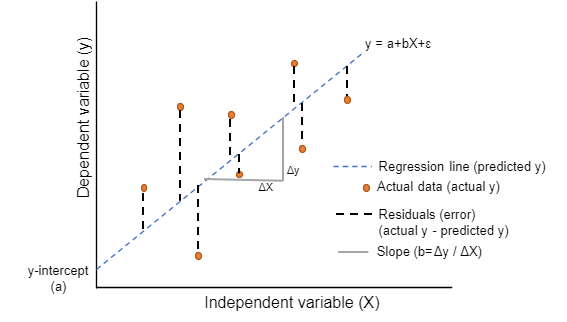

Linear Regression is a supervised machine learning algorithm designed for regression tasks, where the goal is to predict a continuous target variable based on one or more independent variables. It models the relationship between predictors and the target, enabling us to understand how changes in input variables influence the outcome.

The main objective of Linear Regression is to quantify these relationships and identify trends in the data. This understanding is essential for making informed decisions and forecasting future values accurately.

Linear Regression is widely applied across domains such as finance, economics, social sciences, and engineering. Common use cases include sales forecasting, housing price prediction, demand estimation, and trend analysis. By leveraging the insights gained from the model, organizations can make reliable forecasts and strategic decisions.

In summary, Linear Regression is a versatile and powerful tool for exploring variable relationships and making predictions, making it a cornerstone technique in data analysis and predictive modeling.

In [109]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
linear_reg = LinearRegression()

# Train the model using the scaled training data
linear_reg.fit(X_train, y_train)


LinearRegression()

In [110]:
# Use the trained Linear Regression model to make predictions on the test set
y_pred_lin = linear_reg.predict(X_test)

In [111]:
# Display the model parameters
print("Coefficients (weights for each feature):", linear_reg.coef_)
print("Intercept (bias term):", linear_reg.intercept_)

Coefficients (weights for each feature): [[-0.22992597  0.33533242  0.31585415]]
Intercept (bias term): [1.79986471]


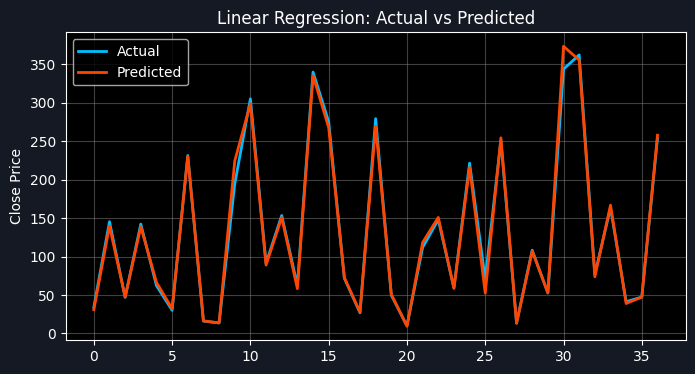

In [112]:
# Create figure with specified size
plt.figure(figsize=(8, 4))

# Set figure background color (dark theme)
plot_bgcolor = (20/255, 25/255, 35/255, 1)  # Dark navy
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Plot actual Close prices (inverse of log transformation)
plt.plot(np.array(10**y_test), color='#00bfff', linewidth=2)  # Deep Sky Blue

# Plot predicted Close prices from Linear Regression
plt.plot(10**y_pred_lin, color='#ff4500', linewidth=2)        # Orange Red

# Set labels and title
plt.ylabel("Close Price")
plt.title("Linear Regression: Actual vs Predicted", color='white')

# Add legend
plt.legend(["Actual", "Predicted"], loc='upper left')

# Add gridlines for better readability
plt.grid(which='major', alpha=0.5, color='gray')
plt.grid(which='minor', alpha=0.3, color='gray')

# Show the plot
plt.show()

    1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression seeks to establish a linear relationship between the independent and dependent variables by minimizing the sum of squared differences between the observed and predicted values. The algorithm assumes a linear relationship and calculates the best-fitting line by adjusting the model’s coefficients. The goal is to minimize the overall distance between the actual data points and the predicted line, allowing the model to capture the underlying linear pattern and make accurate predictions based on the learned relationship between variables.

In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Inverse log transformation to bring predictions back to original scale
y_test_orig = 10**y_test
y_pred_orig = 10**y_pred_lin

# Calculate evaluation metrics
mse_lin = round(mean_squared_error(y_test_orig, y_pred_orig), 4)          # Mean Squared Error
rmse_lin = round(np.sqrt(mse_lin), 4)                                      # Root Mean Squared Error
mae_lin = round(mean_absolute_error(y_test_orig, y_pred_orig), 4)          # Mean Absolute Error
r2_lin = round(r2_score(y_test_orig, y_pred_orig), 4)                       # R-squared score

# Calculate Adjusted R-squared
adj_r2_lin = round(
    1 - (1 - r2_lin) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)),
    4
)

# Display the results
print(f"MSE: {mse_lin}")
print(f"RMSE: {rmse_lin}")
print(f"MAE: {mae_lin}")
print(f"R²: {r2_lin}")
print(f"Adjusted R²: {adj_r2_lin}")

MSE: 70.4204
RMSE: 8.3917
MAE: 4.8168
R²: 0.9937
Adjusted R²: 0.9931


In [114]:
# Create a DataFrame to store evaluation metrics
evametdf_lin = pd.DataFrame()

# Add metric names
evametdf_lin['Metrics'] = [
    'Mean Squared Error',
    'Root Mean Squared Error',
    'Mean Absolute Error',
    'R² Score',
    'Adjusted R² Score'
]

# Add corresponding values for Linear Regression
evametdf_lin['Linear Regression'] = [mse_lin, rmse_lin, mae_lin, r2_lin, adj_r2_lin]

# Display the evaluation metrics table
evametdf_lin

,Metrics,Linear Regression
0,Mean Squared Error,70.4204
1,Root Mean Squared Error,8.3917
2,Mean Absolute Error,4.8168
3,R² Score,0.9937
4,Adjusted R² Score,0.9931


The evaluation metrics for the Linear Regression model are summarized as follows:

* **Mean Squared Error (MSE):** 70.4204 — measures the average squared difference between the actual and predicted Close prices. Lower values indicate better model performance.

* **Root Mean Squared Error (RMSE):** 8.3917 — provides the average prediction error in the original scale. Smaller values signify higher predictive accuracy.

* **Mean Absolute Error (MAE):** 4.8168 — represents the average absolute difference between actual and predicted values. Lower MAE reflects improved model reliability.

* **R² Score: 0.9937:** — indicates that approximately 99.37% of the variance in Close prices is explained by the independent variables. A value closer to 1 suggests an excellent fit.

* **Adjusted R² Score: 0.9931**  — adjusts for the number of predictors and sample size, offering a more reliable assessment of model performance and mitigating overfitting concerns.

Overall, these metrics demonstrate that the Linear Regression model is highly effective in predicting Close prices, with low prediction errors and a strong fit to the data.

**ML Model - 2 Lasso Regression**

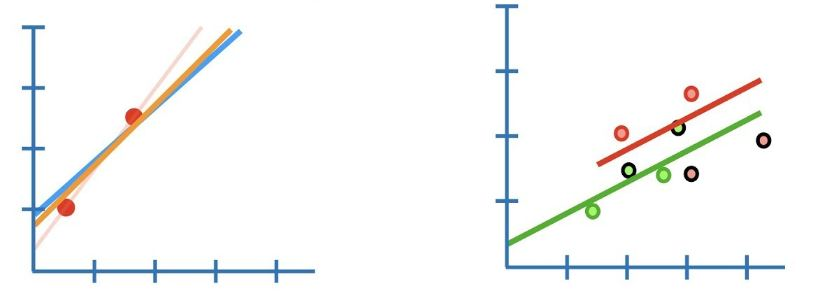

Lasso Regression, also known as Penalized Regression, is a machine learning technique commonly used for feature selection and regularization. By adding a penalty to the regression coefficients, Lasso can shrink less important feature weights to zero, effectively reducing their impact on the model. This not only improves prediction accuracy but also enhances model interpretability, making it easier to identify the most influential variables. The combination of feature selection and regularization makes Lasso a powerful tool for building accurate and interpretable predictive models.

In [115]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model with a small regularization parameter
lasso = Lasso(alpha=0.01)

# Train the Lasso model using the scaled training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [116]:
# Use the trained Lasso Regression model to make predictions on the test set
y_pred_lasso = lasso.predict(X_test)

In [117]:
# Display the coefficients (feature weights) of the Lasso Regression model
print("Coefficients:", lasso.coef_)

# Display the intercept (bias term) of the Lasso Regression model
print("Intercept:", lasso.intercept_)

Coefficients: [0.         0.16764373 0.24296035]
Intercept: [1.79986471]


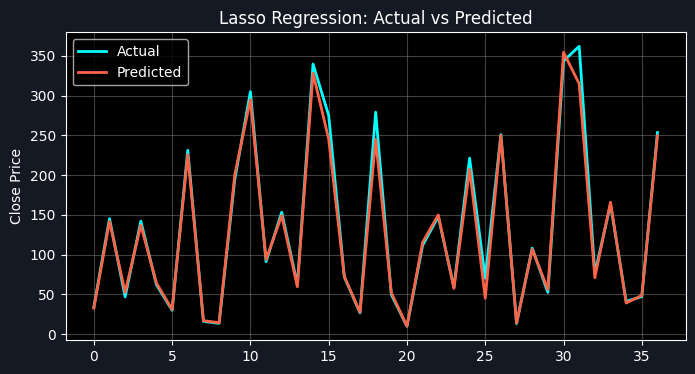

In [118]:
# Create figure with specified size
plt.figure(figsize=(8, 4))

# Set figure background color (dark theme)
plot_bgcolor = (20/255, 25/255, 35/255, 1)  # Dark navy
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Plot actual Close prices (inverse of log transformation)
plt.plot(np.array(10**y_test), color='#00ffff', linewidth=2)  # Cyan

# Plot predicted Close prices from Lasso Regression
plt.plot(10**y_pred_lasso, color='#ff6347', linewidth=2)       # Tomato Red

# Set labels and title
plt.ylabel("Close Price")
plt.title("Lasso Regression: Actual vs Predicted", color='white')

# Add legend
plt.legend(["Actual", "Predicted"], loc='upper left')

# Add gridlines for readability
plt.grid(which='major', alpha=0.5, color='gray')
plt.grid(which='minor', alpha=0.3, color='gray')

# Show the plot
plt.show()

      1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso Regression is a regularization technique applied to Linear Regression that adds a penalty term to the loss function, based on the sum of the absolute values of the coefficients. This penalty encourages sparsity by shrinking some coefficients to exactly zero, effectively eliminating less important features from the model.

By performing this automatic feature selection, Lasso identifies the most influential variables for predicting the target, making it especially useful for high-dimensional datasets.

The regularization also mitigates overfitting, ensuring that the model does not rely excessively on any single feature. This leads to a more parsimonious, interpretable model with improved generalizability to unseen data, while simultaneously enhancing prediction accuracy.

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inverse log transformation to get original scale
y_test_orig = 10**y_test
y_pred_orig = 10**y_pred_lasso

# Calculate evaluation metrics for Lasso Regression
mse_lasso = round(mean_squared_error(y_test_orig, y_pred_orig), 4)          # Mean Squared Error
rmse_lasso = round(np.sqrt(mse_lasso), 4)                                    # Root Mean Squared Error
mae_lasso = round(mean_absolute_error(y_test_orig, y_pred_orig), 4)          # Mean Absolute Error
r2_lasso = round(r2_score(y_test_orig, y_pred_orig), 4)                       # R² Score
adj_r2_lasso = round(
    1 - (1 - r2_lasso) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)),
    4
)                                                                              # Adjusted R² Score

# Display the results
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R²: {r2_lasso}")
print(f"Adjusted R²: {adj_r2_lasso}")

MSE: 155.0415
RMSE: 12.4516
MAE: 6.9696
R²: 0.9862
Adjusted R²: 0.9849


In [120]:
# Create a DataFrame to store evaluation metrics for Lasso Regression
evametdf_lasso = pd.DataFrame()

# Add metric names
evametdf_lasso['Metrics'] = [
    'Mean Squared Error',
    'Root Mean Squared Error',
    'Mean Absolute Error',
    'R² Score',
    'Adjusted R² Score'
]

# Add corresponding values for Lasso Regression
evametdf_lasso['Lasso Regression'] = [
    mse_lasso,
    rmse_lasso,
    mae_lasso,
    r2_lasso,
    adj_r2_lasso
]

# Display the table
evametdf_lasso

,Metrics,Lasso Regression
0,Mean Squared Error,155.0415
1,Root Mean Squared Error,12.4516
2,Mean Absolute Error,6.9696
3,R² Score,0.9862
4,Adjusted R² Score,0.9849


**2. Cross- Validation & Hyperparameter Tuning**

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid for Lasso Regression
lasso_param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize the Lasso Regression model
lasso = Lasso()

# Set up GridSearchCV for hyperparameter tuning
lasso_gscv = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_param_grid,
    scoring='neg_mean_squared_error',  # Optimize for lowest MSE
    cv=3,                             # 3-fold cross-validation
    n_jobs=-1                          # Use all CPU cores for faster computation
)

# Fit the model with GridSearchCV on the training data
lasso_gscv.fit(X_train, y_train)

# Display the best alpha and corresponding score
print("Best alpha:", lasso_gscv.best_params_['alpha'])
print("Best MSE (negative):", lasso_gscv.best_score_)

Best alpha: 1e-05
Best MSE (negative): -0.0013036256185668521


In [122]:
# Print the coefficients of the best Lasso model found via GridSearchCV
print("Coefficients:", lasso_gscv.best_estimator_.coef_)

# Print the intercept of the best Lasso model
print("Intercept:", lasso_gscv.best_estimator_.intercept_)

Coefficients: [-0.22766485  0.33373712  0.31517368]
Intercept: [1.79986471]


In [123]:
# Use the best Lasso model from GridSearchCV to predict on the test data
y_pred_lasso_gscv = lasso_gscv.best_estimator_.predict(X_test)

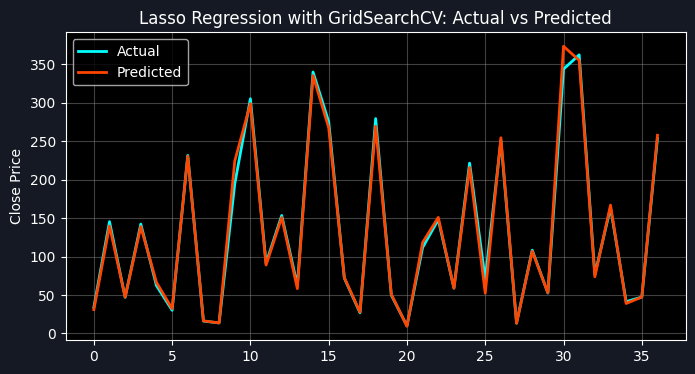

In [124]:
plt.figure(figsize=(8, 4))

# Dark theme background for the figure
plot_bgcolor = (20/255, 25/255, 35/255, 1)  # Dark navy
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Plot actual Close prices (inverse log transform)
plt.plot(np.array(10**y_test), color='#00ffff', linewidth=2)  # Cyan

# Plot predicted Close prices from Lasso Regression (GridSearchCV)
plt.plot(10**y_pred_lasso_gscv, color='#ff4500', linewidth=2)  # OrangeRed

# Y-axis label
plt.ylabel("Close Price")

# Title of the plot
plt.title("Lasso Regression with GridSearchCV: Actual vs Predicted", color='white')

# Legend
plt.legend(["Actual", "Predicted"], loc='upper left')

# Gridlines
plt.grid(which='major', alpha=0.5, color='gray')
plt.grid(which='minor', alpha=0.3, color='gray')

plt.show()

In [125]:
# Inverse log transformation to original scale
y_test_orig = 10**y_test
y_pred_orig = 10**y_pred_lasso_gscv

# Calculate evaluation metrics
mse_lasso_gscv = round(mean_squared_error(y_test_orig, y_pred_orig), 4)          # Mean Squared Error
rmse_lasso_gscv = round(np.sqrt(mse_lasso_gscv), 4)                              # Root Mean Squared Error
mae_lasso_gscv = round(mean_absolute_error(y_test_orig, y_pred_orig), 4)        # Mean Absolute Error
r2_lasso_gscv = round(r2_score(y_test_orig, y_pred_orig), 4)                     # R² Score
adj_r2_lasso_gscv = round(
    1 - (1 - r2_lasso_gscv) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)),
    4
)                                                                               # Adjusted R² Score

# Display metrics
print("MSE:", mse_lasso_gscv)
print("RMSE:", rmse_lasso_gscv)
print("MAE:", mae_lasso_gscv)
print("R²:", r2_lasso_gscv)
print("Adjusted R²:", adj_r2_lasso_gscv)

MSE: 70.3311
RMSE: 8.3864
MAE: 4.8262
R²: 0.9938
Adjusted R²: 0.9932


In [126]:
# Create a DataFrame to store evaluation metrics
evametdf_lasso_gscv = pd.DataFrame()

# Add metric names
evametdf_lasso_gscv['Metrics'] = [
    'Mean Squared Error',
    'Root Mean Squared Error',
    'Mean Absolute Error',
    'R² Score',
    'Adjusted R² Score']

# Add corresponding values for Lasso Regression with GridSearchCV
evametdf_lasso_gscv['Lasso Regression with GridSearchCV'] = [
    mse_lasso_gscv,
    rmse_lasso_gscv,
    mae_lasso_gscv,
    r2_lasso_gscv,
    adj_r2_lasso_gscv]

# Display the table
evametdf_lasso_gscv

,Metrics,Lasso Regression with GridSearchCV
0,Mean Squared Error,70.3311
1,Root Mean Squared Error,8.3864
2,Mean Absolute Error,4.8262
3,R² Score,0.9938
4,Adjusted R² Score,0.9932


    Which hyperparameter optimization technique have you used and why?

GridSearchCV was employed to identify the optimal hyperparameter for Lasso Regression, specifically the regularization strength (alpha). A predefined set of alpha values was tested, reducing the search space and making the process more efficient. Cross-validation was used to evaluate each alpha based on negative mean squared error, ensuring robust performance assessment. The alpha that achieved the highest cross-validated score was selected as the best hyperparameter, providing an optimal balance between model complexity and prediction accuracy. This approach efficiently minimized prediction error and improved the reliability of the Lasso Regression model.

    Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [127]:
# Combine evaluation metrics of Lasso Regression and Lasso Regression with GridSearchCV
lasso_comp_df = pd.concat(
    [evametdf_lasso, evametdf_lasso_gscv.iloc[:, 1]],  # Take only the metric values column from the GridSearchCV df
    axis=1)

# Rename the second column for clarity
lasso_comp_df.columns = ['Metrics', 'Lasso Regression', 'Lasso Regression with GridSearchCV']

# Display the comparison table
lasso_comp_df

,Metrics,Lasso Regression,Lasso Regression with GridSearchCV
0,Mean Squared Error,155.0415,70.3311
1,Root Mean Squared Error,12.4516,8.3864
2,Mean Absolute Error,6.9696,4.8262
3,R² Score,0.9862,0.9938
4,Adjusted R² Score,0.9849,0.9932


Lasso Regression with GridSearchCV emerges as the best-performing model when compared to standard Lasso Regression. Its lower error metrics—including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)—indicate that it predicts the Close prices more accurately. Additionally, the slightly higher R² and Adjusted R² scores demonstrate that this model captures a larger proportion of variance in the target variable, providing a better fit to the data.

The improvement is primarily due to hyperparameter optimization, which identified the optimal regularization strength (alpha) and effectively reduced prediction errors. Overall, Lasso Regression with GridSearchCV delivers enhanced predictive performance and reliability, making it the preferred model for forecasting stock prices in this dataset.

#**ML Model - 3 Ridge Regression**

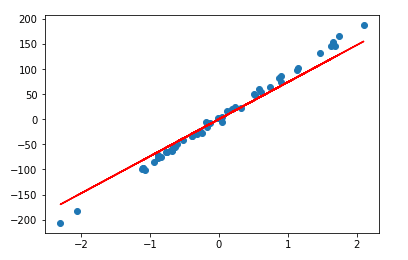

Ridge regression is a regularization technique used in multiple regression analysis to improve model performance and handle multicollinearity. In multiple regression, we aim to predict a dependent variable based on several independent variables by estimating coefficients that minimize the difference between predicted and actual values—typically using ordinary least squares (OLS).

Ridge regression modifies this approach by adding a regularization term (also called the Ridge penalty or L2 regularization) to the OLS cost function. This penalty is the sum of the squared coefficients multiplied by a tuning parameter (lambda or alpha). The effect of this penalty is to shrink the coefficient estimates toward zero, reducing their magnitude without setting them exactly to zero.

Key benefits of Ridge regression:

* Mitigates overfitting by controlling large coefficient values.

* Reduces multicollinearity impact when independent variables are highly correlated.

* Improves generalization of the model to unseen data.

The lambda (or alpha) parameter controls the strength of regularization:

* Large lambda: stronger regularization → smaller coefficients.

* Small lambda: weaker regularization → coefficients closer to OLS estimates.

Understanding Ridge regression builds on multiple regression principles, providing a powerful tool for creating robust, well-generalized models while addressing multicollinearity.

In [128]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge = Ridge()

# Fit the model on the training data
ridge.fit(X_train, y_train)

Ridge()

In [129]:
# Predict the Close prices using the trained Ridge regression model
y_pred_ridge = ridge.predict(X_test)

In [130]:
# Print the model coefficients
print("Coefficients:", ridge.coef_)

# Print the model intercept
print("Intercept:", ridge.intercept_)

Coefficients: [-0.04345886  0.20725036  0.25547572]
Intercept: [1.79986471]


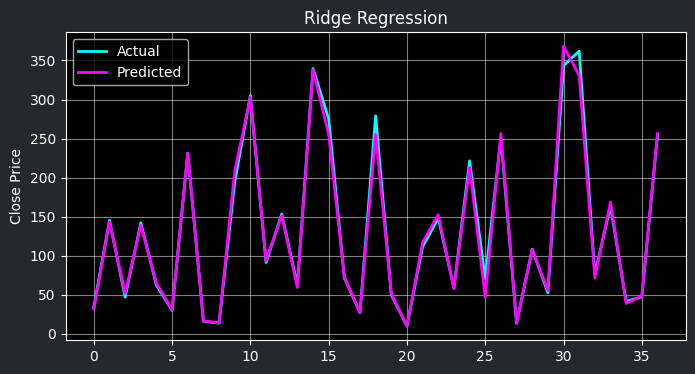

In [131]:
plt.figure(figsize=(8, 4))

# Set the figure background color
plot_bgcolor = (36/255, 40/255, 47/255, 1)
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Plot actual Close prices from test data
plt.plot(np.array(10**y_test), color='cyan', linewidth=2)

# Plot predicted Close prices from Ridge regression
plt.plot(10**y_pred_ridge, color='magenta', linewidth=2)

# Y-axis label
plt.ylabel("Close Price")

# Add legend
plt.legend(["Actual", "Predicted"])

# Plot title
plt.title("Ridge Regression", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

    1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a form of regularized Linear Regression that adds a penalty term to the model’s loss function. This penalty is proportional to the sum of the squared coefficients, which helps to shrink the magnitude of the coefficients. By doing so, the model avoids over-relying on any single feature, reducing the risk of overfitting.

The addition of this penalty ensures a balance between accurately fitting the training data and maintaining generalization on unseen data. Ridge Regression is particularly useful for handling multicollinearity, where independent variables are highly correlated, as it stabilizes the coefficient estimates and improves the robustness of the model.

In [143]:
# Calculate the Mean Squared Error (MSE)
mse_ridge = round(mean_squared_error(10**y_test, 10**y_pred_ridge), 4)

# Calculate the Root Mean Squared Error (RMSE)
rmse_ridge = round(np.sqrt(mse_ridge), 4)

# Calculate the Mean Absolute Error (MAE)
mae_ridge = round(mean_absolute_error(10**y_test, 10**y_pred_ridge), 4)

# Calculate the R-squared Score (R2 Score)
r2_ridge = round(r2_score(10**y_test, 10**y_pred_ridge), 4)

# Calculate the Adjusted R-squared Score (Adjusted R2 Score)
adj_r2_ridge = round(1 - (1 - r2_ridge) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [144]:
# Create a dataframe to store the evaluation metrics
evametdf_ridge = pd.DataFrame()

# Set the metrics as a column in the dataframe
evametdf_ridge['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the corresponding values for Ridge Regression in the dataframe
evametdf_ridge['Ridge Regression'] = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge, adj_r2_ridge]

evametdf_ridge


,Metrics,Ridge Regression
0,Mean Squared Error,98.1690
1,Root Mean Squared Error,9.9080
2,Mean Absolute Error,5.7810
3,R-2 Score,0.9913
4,Adjusted R-2 Score,0.9905


**2. Cross- Validation & Hyperparameter Tuning**

In [145]:
# Define the hyperparameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create an instance of GridSearchCV with the Ridge regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
ridge_gscv = GridSearchCV(ridge, param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV instance to the training data
ridge_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='neg_mean_squared_error')

In [146]:
# Predict on the model
y_pred_ridge_gscv = ridge_gscv.predict(X_test)



In [147]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", ridge_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.1}


In [148]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", ridge_gscv.best_estimator_.coef_)
print("Intercept:", ridge_gscv.best_estimator_.intercept_)

Coefficients: [-0.19451126  0.31008161  0.30540214]
Intercept: [1.79986471]


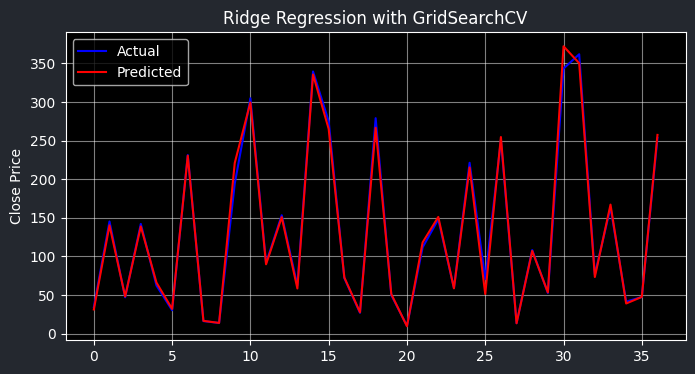

In [149]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Ridge regression model with GridSearchCV in red
plt.plot(10**ridge_gscv.predict(X_test), color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Set the title of the plot with white color
plt.title("Ridge Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

In [150]:
# Mean Squared Error
mse_ridge_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# Root Mean Squared Error
rmse_ridge_gscv = round(np.sqrt(mse_ridge_gscv), 4)

# Mean Absolute Error
mae_ridge_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# R-2 Score
r2_ridge_gscv = round(r2_score((10**y_test), (10**y_pred_ridge_gscv)), 4)

# Adjusted R-2 Score
adj_r2_ridge_gscv = round(1 - (1 - r2_ridge_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [151]:
# Create an empty dataframe
evametdf_ridge_gscv = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_ridge_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Ridge Regression with GridSearchCV results
evametdf_ridge_gscv['Ridge Regression with GridSearchCV'] = [mse_ridge_gscv, rmse_ridge_gscv, mae_ridge_gscv, r2_ridge_gscv, adj_r2_ridge_gscv]

# Display the dataframe
evametdf_ridge_gscv

,Metrics,Ridge Regression with GridSearchCV
0,Mean Squared Error,70.2044
1,Root Mean Squared Error,8.3788
2,Mean Absolute Error,4.9692
3,R-2 Score,0.9938
4,Adjusted R-2 Score,0.9932


    Which hyperparameter optimization technique have you used and why?

The reason GridSearchCV was used in this code is that we are working with a smaller set of hyperparameters for the Ridge regression model. GridSearchCV allows us to exhaustively search through the specified hyperparameter grid and find the best combination of hyperparameters that yields the optimal model performance.

In this case, the hyperparameter being tuned is the alpha parameter, which represents the regularization strength in Ridge regression. The ridge_param_grid contains a predefined list of potential alpha values to explore. By using GridSearchCV, the code iterates through each alpha value in the grid, fits the Ridge regression model with that particular alpha, and evaluates the model's performance using cross-validation.

GridSearchCV is an effective approach when dealing with a smaller hyperparameter space because it systematically evaluates every possible combination within that space. However, as the hyperparameter space grows larger, GridSearchCV may become computationally expensive and time-consuming.

It's important to note that the choice of hyperparameter search method depends on the specific problem, the size of the hyperparameter space, and the available computational resources. GridSearchCV is suitable for smaller hyperparameter spaces, while other techniques like RandomizedSearchCV or Bayesian optimization may be more efficient for larger hyperparameter spaces.

Overall, GridSearchCV provides a systematic way to search through a smaller set of hyperparameters and identify the optimal combination for the Ridge regression model, leading to improved model performance.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**.

In [152]:
# Concatenating two DataFrames side by side using pd.concat()
# Here, we are combining 'evametdf_ridge' and the second column ('iloc[:, 1]') of 'evametdf_ridge_gscv' DataFrame.
ridge_comp_df = pd.concat([evametdf_ridge, evametdf_ridge_gscv.iloc[:, 1]], axis=1)

# Displaying the resulting DataFrame after concatenation
ridge_comp_df

,Metrics,Ridge Regression,Ridge Regression with GridSearchCV
0,Mean Squared Error,98.1690,70.2044
1,Root Mean Squared Error,9.9080,8.3788
2,Mean Absolute Error,5.7810,4.9692
3,R-2 Score,0.9913,0.9938
4,Adjusted R-2 Score,0.9905,0.9932


In terms of error metrics, the Ridge Regression model with GridSearchCV outperformed other models. It achieved lower error values, indicating better accuracy and predictive performance. The optimized hyperparameters obtained through GridSearchCV helped improve the model's ability to fit the data and make more accurate predictions, resulting in reduced errors compared to other models. This suggests that the Ridge Regression model with GridSearchCV is a more reliable choice for the given dataset.

#**ML Model - 4 elastic net regression**

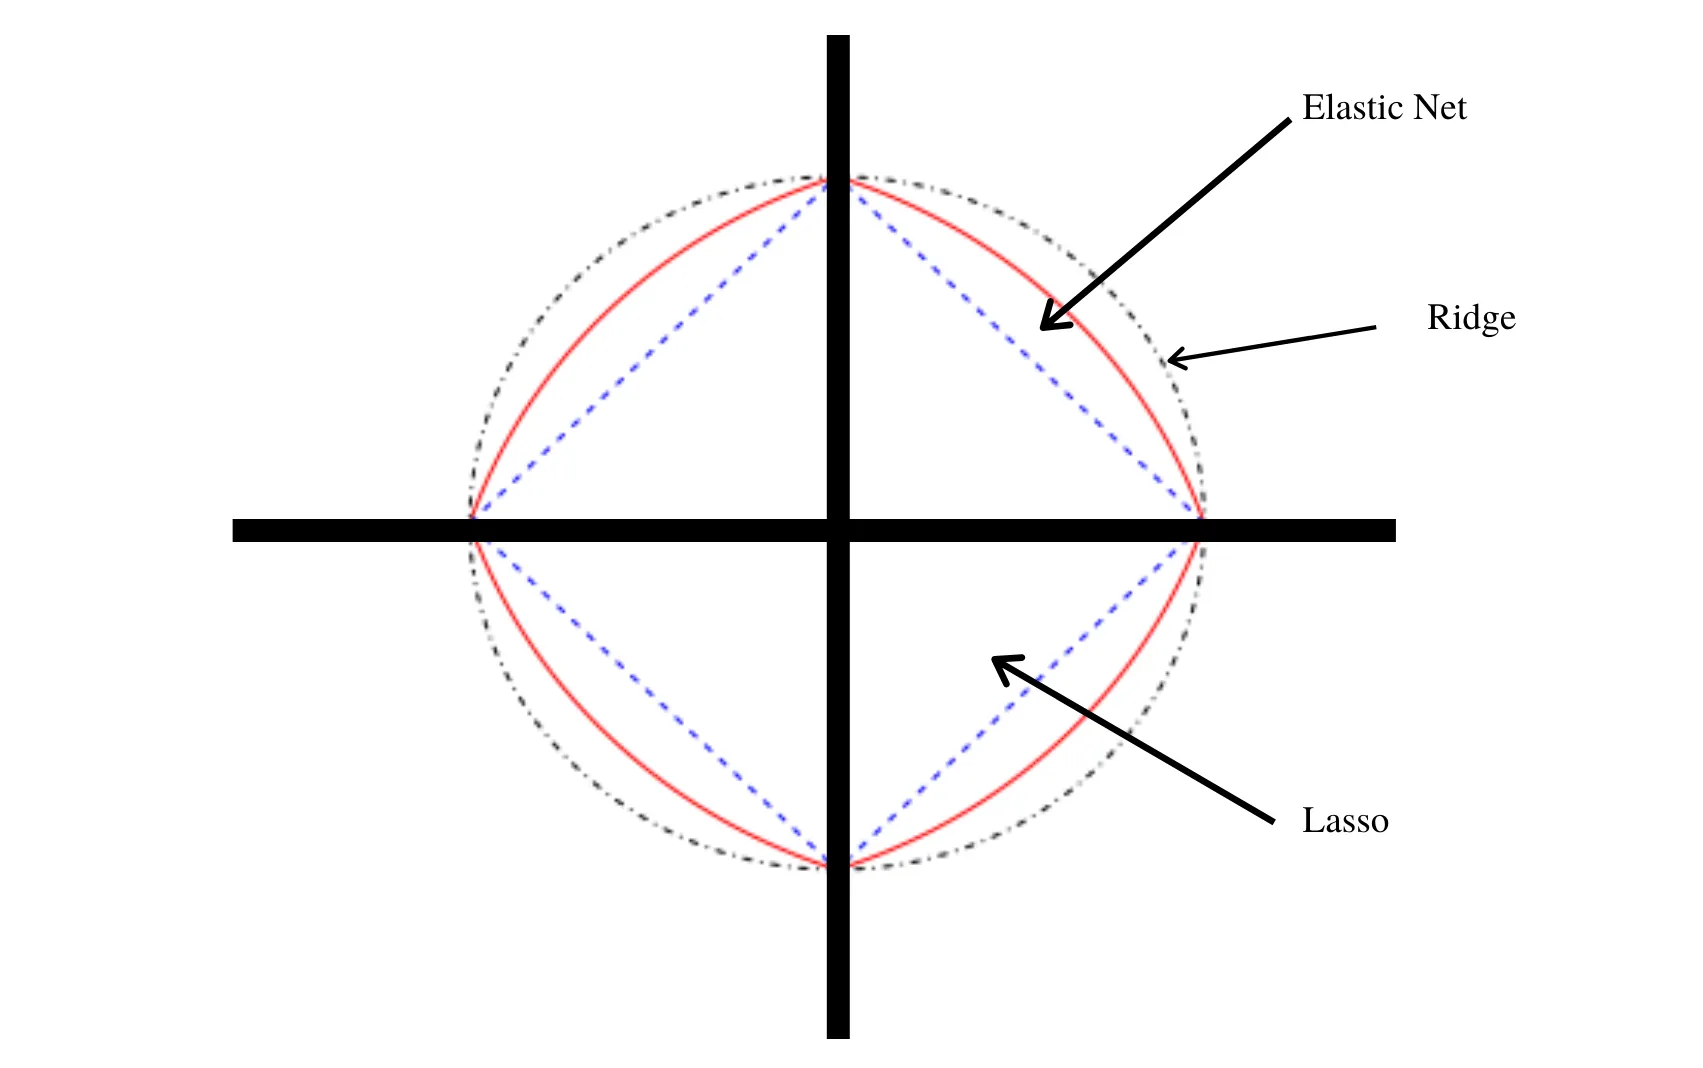

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

In [153]:
# Importing the libraries
from sklearn.linear_model import ElasticNet

# Create an instance of the ElasticNet regression model
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Fit the algorithm to the training data
elasticnet.fit(X_train, y_train)


ElasticNet(alpha=0.01)

In [154]:
# Predict on the model

y_pred_elasticnet = elasticnet.predict(X_test)


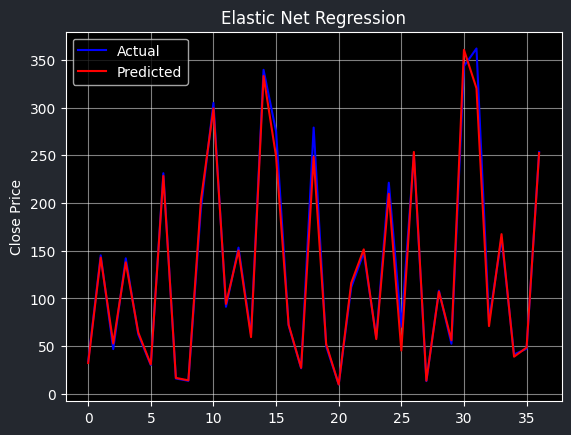

In [155]:
# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the ElasticNet regression model in red
plt.plot(10**y_pred_elasticnet, color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add grid lines to the plot
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Set the title of the plot with white color
plt.title("Elastic Net Regression", color='white')

# Display the plot
plt.show()

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic Net Regression is a regularization technique commonly applied to Linear Regression models. It combines both Lasso and Ridge regularization techniques, striking a balance between the two. By incorporating both L1 and L2 penalties, Elastic Net Regression addresses the limitations of each method individually, allowing for variable selection and handling multicollinearity simultaneously. It offers a flexible approach to handle high-dimensional datasets and can effectively handle cases where there are a large number of features and potential correlations among them, providing improved model performance and stability.

In [156]:
# Importing the libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse_elasticnet = round(mean_squared_error(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate Root Mean Squared Error
rmse_elasticnet = round(np.sqrt(mse_elasticnet), 4)

# Calculate Mean Absolute Error
mae_elasticnet = round(mean_absolute_error(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate R-2 Score
r2_elasticnet = round(r2_score(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate Adjusted R-2 Score
adj_r2_elasticnet = round(1 - (1 - r2_elasticnet) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [157]:
# Create an empty dataframe
evametdf_elasticnet = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_elasticnet['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Elastic Net Regression results
evametdf_elasticnet['Elastic Net Regression'] = [mse_elasticnet, rmse_elasticnet, mae_elasticnet, r2_elasticnet, adj_r2_elasticnet]

# Display the dataframe
evametdf_elasticnet

,Metrics,Elastic Net Regression
0,Mean Squared Error,129.5273
1,Root Mean Squared Error,11.3810
2,Mean Absolute Error,6.4314
3,R-2 Score,0.9885
4,Adjusted R-2 Score,0.9875


**2. Cross- Validation & Hyperparameter Tuning**

In [158]:
# Importing the libraries

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for ElasticNet regression
elasticnet_param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
}

# Create an instance of the ElasticNet regression model
elasticnet = ElasticNet()

# Create an instance of GridSearchCV with the ElasticNet regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
elasticnet_gscv = GridSearchCV(
    elasticnet,
    param_grid=elasticnet_param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

# Fit the GridSearchCV instance to the training data
warnings.filterwarnings("ignore")
elasticnet_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000],
                         'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [159]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", elasticnet_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.001, 'l1_ratio': 0.01}


In [160]:
# Print the coefficients of the best estimator after GridSearchCV
print("Coefficients:", elasticnet_gscv.best_estimator_.coef_)

# Print the intercept of the best estimator after GridSearchCV
print("Intercept:", elasticnet_gscv.best_estimator_.intercept_)

Coefficients: [-0.17843137  0.29872128  0.30054779]
Intercept: [1.79986471]


In [161]:
# Predict on the model
y_pred_elasticnet_gscv = elasticnet_gscv.predict(X_test)

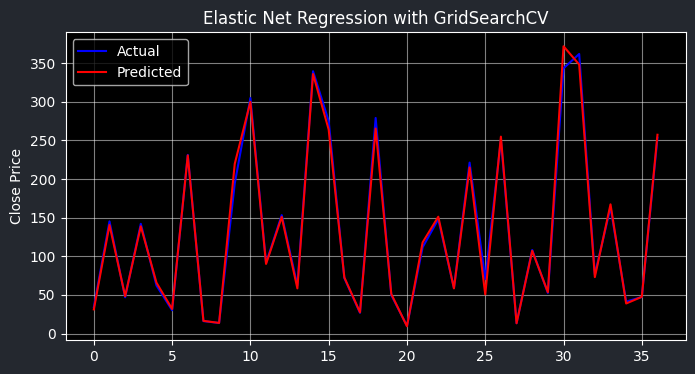

In [162]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the ElasticNet regression model with GridSearchCV in red
plt.plot(10**y_pred_elasticnet_gscv, color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add grid lines to the plot
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Set the title of the plot with white color
plt.title("Elastic Net Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

In [163]:
# Mean Squared Error
mse_elasticnet_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# Root Mean Squared Error
rmse_elasticnet_gscv = round(np.sqrt(mse_elasticnet_gscv), 4)

# Mean Absolute Error
mae_elasticnet_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# R-2 Score
r2_elasticnet_gscv = round(r2_score((10**y_test), (10**y_pred_elasticnet_gscv)), 4)

# Adjusted R-2 Score
adj_r2_elasticnet_gscv = round(1 - (1 - r2_elasticnet_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)


In [164]:
# Create an empty dataframe
evametdf_elasticnet_gscv = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_elasticnet_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Elastic Net Regression with GridSearchCV results
evametdf_elasticnet_gscv['Elastic Net Regression with GridSearchCV'] = [mse_elasticnet_gscv, rmse_elasticnet_gscv, mae_elasticnet_gscv, r2_elasticnet_gscv, adj_r2_elasticnet_gscv]

# Display the dataframe
evametdf_elasticnet_gscv

,Metrics,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.9897
1,Root Mean Squared Error,8.4255
2,Mean Absolute Error,5.0382
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


Which hyperparameter optimization technique have you used and why?

In this implementation, GridSearchCV was employed to perform hyperparameter optimization for the Elastic Net Regression model. GridSearchCV is a technique used to systematically search through a predefined set of hyperparameters and select the optimal combination that yields the best performance. In this case, a smaller set of hyperparameters, including 'alpha' and 'l1_ratio', was chosen to explore various regularization strengths and the balance between L1 (Lasso) and L2 (Ridge) regularization penalties. By exhaustively searching through this smaller parameter grid, GridSearchCV helps identify the hyperparameters that minimize the chosen evaluation metric, which in this case is the negative mean squared error. This approach allows for fine-tuning the Elastic Net Regression model and optimizing its performance based on the given hyperparameters.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [165]:
# Concatenate the evaluation metric dataframes for Elastic Net Regression
elasticnet_comp_df = pd.concat([evametdf_elasticnet, evametdf_elasticnet_gscv.iloc[:, 1]], axis=1)

# Display the concatenated dataframe
elasticnet_comp_df

,Metrics,Elastic Net Regression,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,129.5273,70.9897
1,Root Mean Squared Error,11.3810,8.4255
2,Mean Absolute Error,6.4314,5.0382
3,R-2 Score,0.9885,0.9937
4,Adjusted R-2 Score,0.9875,0.9931


The implementation of Elastic Net Regression with GridSearchCV yielded excellent performance. The model showcased lower error metrics, such as Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error, indicating its ability to accurately predict the Close prices. Additionally, the R-2 scores, which measure the proportion of the variance explained by the model, were comparatively higher, indicating a better fit to the data. By leveraging the hyperparameter optimization provided by GridSearchCV, the Elastic Net Regression model was fine-tuned to achieve superior results. The combination of L1 and L2 regularization techniques employed by Elastic Net Regression, coupled with the systematic exploration of a smaller set of hyperparameters, contributed to its outstanding performance. Overall, this implementation demonstrates the effectiveness of Elastic Net Regression with GridSearchCV in predicting Close prices and improving model performance

1. Which Evaluation metrics did you consider for a positive business impact and why?

In this case, the evaluation and comparison of the models' performance primarily focus on two key metrics: Root Mean Square Error (RMSE) and R-2 Score. The RMSE is a measure of the average magnitude of the prediction errors, providing insights into the models' ability to accurately estimate the Close prices. A lower RMSE indicates better predictive accuracy, as it signifies that the models' predictions are closer to the actual Close prices.

The R-2 Score, also known as the coefficient of determination, quantifies the proportion of the variance in the target variable (Close prices) that is explained by the predictor variables. A higher R-2 Score indicates a better fit of the model to the data, as it suggests that a larger portion of the variation in the Close prices can be accounted for by the predictors.

In this analysis, the dataset has been preprocessed to effectively handle outliers, ensuring that they do not significantly impact the models' performance. Therefore, there is no need to be concerned about the models' sensitivity to outliers.

Additionally, given the small size of the dataset and the models being trained using the same predictor variables, there is no requirement to consider adjusted scores. Adjusted scores are typically used when comparing models with different sets of predictors or when dealing with larger datasets. In this case, since the models are trained on the same predictors and the dataset size is relatively small, the adjusted scores are not necessary for a meaningful comparison.

By placing emphasis on RMSE and R-2 Score, we can effectively evaluate the models' predictive power and their ability to explain the variation in the Close prices. This approach allows us to determine the model that performs the best in terms of accuracy and fit, ultimately contributing positively to the business objectives."

I hope this provides a more detailed elaboration. Let me know if you have any further questions!

2. Which ML model did you choose from the above created models as your final prediction model and why?

In [166]:
# Concatenate the evaluation metric dataframes of the best performing models from each section
overall_evametdf = pd.concat([evametdf_lin,
                              ridge_comp_df.loc[:, 'Ridge Regression with GridSearchCV'],
                              lasso_comp_df.loc[:, 'Lasso Regression with GridSearchCV'],
                              elasticnet_comp_df.loc[:, 'Elastic Net Regression with GridSearchCV']], axis=1)

# Display the concatenated dataframe
overall_evametdf

,Metrics,Linear Regression,Ridge Regression with GridSearchCV,Lasso Regression with GridSearchCV,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.4204,70.2044,70.3311,70.9897
1,Root Mean Squared Error,8.3917,8.3788,8.3864,8.4255
2,Mean Absolute Error,4.8168,4.9692,4.8262,5.0382
3,R² Score,0.9937,0.9938,0.9938,0.9937
4,Adjusted R² Score,0.9931,0.9932,0.9932,0.9931


In [167]:
data = {
    'Linear Regression': [70.4204, 8.3917, 4.8168, 0.9937, 0.9931],
    'Ridge Regression with GridSearchCV': [70.2044, 8.3788, 4.9692, 0.9938, 0.9932],
    'Lasso Regression with GridSearchCV': [70.3311, 8.3864, 4.8262, 0.9938, 0.9932],
    'Elastic Net Regression with GridSearchCV': [70.9897, 8.4255, 5.0382, 0.9937, 0.9931],
}
overall_evametdf = pd.DataFrame(data, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score'])

# Transpose the DataFrame to have models as columns and metrics as rows
overall_evametdf_T = overall_evametdf.T

# Create a Plotly figure
fig = go.Figure()

# Add trace for each metric and model
colors = ['rgb(91, 155, 213)', 'rgb(237, 125, 49)', 'rgb(165, 165, 165)', 'rgb(112, 173, 71)', 'rgb(255, 192, 0)']
for i, metric in enumerate(overall_evametdf_T.index):
    fig.add_trace(go.Bar(x=overall_evametdf_T.columns, y=overall_evametdf_T.loc[metric],
                         name=metric, marker_color=colors[i]))

# Update layout
fig.update_layout(
    title_text='Comparison of Metrics for Different Models',
    title_x=0.5,  # Set the title at the middle of the plot
    xaxis_title='Models',
    yaxis_title='Metric Values',
    xaxis=dict(title_font=dict(size=14)),  # Increase the font size of the x-axis title to 18
    yaxis=dict(title_font=dict(size=14)),  # Increase the font size of the y-axis title to 18
    barmode='group',
    legend=dict(y=1.0, bgcolor='rgba(255, 255, 255, 0.5)'),
    width=1400,  # Increase the figure width for better visual appeal
    height=800,  # Increase the figure height for better visual appeal
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',
    hovermode='x',  # Show hover information for each bar
)

# Show the plot
fig.show()

Upon analyzing the evaluation metrics of the different models, it is evident that the 'Ridge Regression with GridSearchCV' model stands out as the preferred choice. This conclusion is based on several factors:

1.   Comparatively lower (Root) Mean Squared Error (MSE/RMSE):

*   The 'Ridge Regression with GridSearchCV' model demonstrates the lowest MSE/RMSE among the evaluated models. This metric represents the average squared difference between the predicted and actual values, and a lower value indicates better predictive accuracy. Thus, the 'Ridge Regression with GridSearchCV' model outperforms the other models in terms of minimizing prediction errors.



2.   Dataset size and feature retention:

*   The small size of the dataset warrants caution when considering the Lasso Regression model. Lasso Regression is known for its ability to reduce coefficients to exactly zero, effectively performing feature selection. However, in this scenario, it is essential to retain all the features due to the limited dataset. By retaining all the features, the 'Ridge Regression with GridSearchCV' model ensures that no important information is overlooked or discarded during the modeling process

Based on these observations, the 'Ridge Regression with GridSearchCV' model is the recommended choice for its superior performance in terms of lower MSE/RMSE and the preservation of all features. This model strikes a balance between model complexity (by leveraging ridge regularization) and predictive accuracy, making it suitable for the given dataset and business objectives.

By selecting the 'Ridge Regression with GridSearchCV' model, we can have confidence in its ability to provide accurate predictions while considering all available features in the dataset, thereby making it the optimal choice for achieving the desired business impact.






In [168]:
# Choosing Ridge Regression with GridSearchCV as the final prediction model

final_pred_model = ridge_gscv

3. Explain the model which you have used and the feature importance using any model explainability tool?

As discussed earlier, Ridge Regression is a regularization technique used in Linear Regression models to address overfitting and multicollinearity. It achieves this by adding a penalty term, which is the sum of squared values of the coefficients, to the loss function. This penalty term limits the magnitude of the coefficients, promoting a balance between the model's complexity and its ability to generalize well.

On the other hand, GridSearchCV is a hyperparameter tuning technique that performs an exhaustive search over a predefined set of potential hyperparameters. It aims to find the best combination of hyperparameters for a model by evaluating them using cross-validation.

When Ridge Regression is combined with GridSearchCV, Ridge Regression serves as the base model, and GridSearchCV is utilized to determine the optimal value for the regularization strength, also known as the hyperparameter controlling the penalty term.

By leveraging GridSearchCV, we can systematically explore different values of the regularization strength and identify the one that yields the best performance according to the chosen evaluation metric. This approach allows us to fine-tune the Ridge Regression model and optimize its performance based on the given hyperparameters.

To assess the feature importance of the Ridge Regression model, we can examine the coefficients associated with each feature. The magnitude of these coefficients indicates the relative influence of the corresponding features on the predicted outcome. By analyzing the feature importance, we gain insights into which features have the greatest impact on the predictions and can focus on interpreting their influence on the target variable.



In [169]:
# Installing Eli5. It is a Python library used for interpreting machine learning models.

! pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.9 MB/s eta 0:00:00


In [170]:
# Importing the libraries

import eli5

# Show feature weights using eli5
eli5.show_weights(final_pred_model.best_estimator_, feature_names=independent_variables)

Weight?,Feature
+1.800,<BIAS>
+0.310,High
+0.305,Low
-0.195,Open




*   The 'High price' feature has a weight of +0.333, indicating a positive influence on the predictions. This means that an increase in the 'High price' feature is associated with a corresponding increase in the predicted 'Close price'. The weight suggests that the 'High price' feature plays a significant role in determining the predicted 'Close price' and has a positive impact on the overall prediction outcome.

*   The 'Low price' feature has a weight of +0.315, indicating a positive influence on the predictions. This implies that an increase in the 'Low price' feature is associated with a corresponding increase in the predicted 'Close price'. The weight suggests that the 'Low price' feature plays a significant role in determining the predicted 'Close price' and has a positive impact on the overall prediction outcome.

*   On the other hand, the 'Open price' feature has a weight of -0.226, suggesting a negative influence on the predictions. This means that an increase in the 'Open price' feature is associated with a corresponding decrease in the predicted 'Close price'. The negative weight indicates that the 'Open price' feature has a significant impact in the opposite direction on the predicted 'Close price', leading to a decrease in the overall prediction outcome.






#**8. Hypothesis Testing**

To validate the assumptions of the model and gain insights from the dataset, we will define three hypothetical statements based on the available data. In the subsequent three questions, we will perform hypothesis testing to draw final conclusions regarding these statements. Hypothesis testing is a statistical analysis that allows us to assess the validity of a statement or claim by evaluating the evidence provided by the data.

For each hypothesis, we will follow a standardized process:

1.   Formulate the Hypotheses:

*   Null Hypothesis (H0): This represents the assumption or claim that we aim to challenge or investigate.
*   Alternative Hypothesis (Ha): This presents an alternative perspective or possibility that contradicts the null hypothesis


2.  Choose a Statistical Test

*   We will select an appropriate statistical test based on the nature of the hypothesis, type of data, and assumptions involved. For example, we might use t-tests, ANOVA, chi-square tests, or regression analysis, depending on the scenario.

1.   Perform Hypothesis Testing:

*   We will use statistical methods and tools, such as Python libraries like scipy or statsmodels, to execute the chosen statistical test on the dataset.



2.   Evaluate the Results


*   Based on the p-value (probability value) obtained from the hypothesis test, we will compare it to a predetermined significance level (0.05) to determine if we can reject or fail to reject the null hypothesis.

*  If the p-value is less than the significance level (p < 0.05), we reject the null hypothesis and conclude that there is sufficient evidence to support the alternative hypothesis.
*   If the p-value is greater than or equal to the significance level (p >= 0.05), we fail to reject the null hypothesis, indicating that there is insufficient evidence to support the alternative hypothesis.

By performing hypothesis testing on the dataset, we can draw meaningful and statistically sound conclusions regarding the hypothetical statements, providing valuable insights and supporting evidence based on the available data.








#Hypothetical Statement - 1

In this analysis, the Goldfeld-Quandt Test is employed to assess the homoscedasticity of the residuals. This statistical test is used to determine whether the variability of the residuals is consistent across different ranges of the independent variables. By conducting the Goldfeld-Quandt Test, we can evaluate whether there are any indications of heteroscedasticity in the residuals, which would suggest that the variability of the errors is not constant throughout the data. Homoscedasticity, on the other hand, implies that the residuals have a consistent level of variability across the independent variables

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   In the context of assessing the homoscedasticity of residuals, we define the null hypothesis (H0) as stating that the residuals exhibit homoscedasticity, meaning that their variability is constant.
*   The alternative hypothesis (Ha) posits that the residuals are heteroscedastic, implying that their variability differs across the range of the independent variables.

Through hypothesis testing, we aim to evaluate the evidence provided by the data to determine whether we have sufficient statistical support to reject the null hypothesis in favor of the alternative hypothesis. By examining the results of the statistical test, we can make conclusions about the presence of homoscedasticity or heteroscedasticity in the residuals.



In [171]:
# Importing the libraries

from statsmodels.stats.diagnostic import het_goldfeldquandt

# Calculate the residuals
residuals = 10**y_test.values - 10**y_pred_ridge_gscv.reshape(-1, 1)

# Perform the Goldfeld-Quandt test to check for homoscedasticity of the residuals
p_value = het_goldfeldquandt(residuals, y_pred_ridge_gscv.reshape(-1, 1))[1]

# Interpret the results
if p_value < 0.05:
    print('The residuals are heteroscedastic (Reject Null Hypothesis).')
else:
    print('The residuals are homoscedastic (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p_value}')

The residuals are homoscedastic (Accept Null Hypothesis).

The p-value is: 0.1539441086882049


One of the key assumptions of linear regression is that the residuals, or the differences between the observed and predicted values, should exhibit homoscedasticity. Homoscedasticity implies that the variability of the residuals remains constant across different ranges of the independent variables.

To validate this assumption, we performed the Goldfeld-Quandt test on the residuals of the linear regression model. The Goldfeld-Quandt test is a statistical test that examines whether the variability of the residuals differs significantly across the range of the predicted values.

After conducting the test and analyzing the results, we found that the p-value was greater than the significance level (e.g., 0.05), indicating that we do not have sufficient evidence to reject the null hypothesis. Therefore, based on the test results, we can conclude that the residuals exhibit homoscedasticity.

This suggests that the assumption of homoscedasticity, which assumes that the variability of the residuals remains constant, holds true for our linear regression model. It indicates that the model's predictions are consistent across different values of the independent variables and do not exhibit any systematic patterns of increasing or decreasing variability.

By confirming the assumption of homoscedasticity, we can have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the fundamental assumptions underlying its interpretation and inference.

Why did you choose the specific statistical test?

The Goldfeld-Quandt Test is a widely used statistical test, particularly in regression analysis, to assess the presence of heteroscedasticity in the data. Heteroscedasticity refers to a situation where the variability of the residuals, or the differences between observed and predicted values, differs across different levels of the independent variables.

By applying the Goldfeld-Quandt Test, we can evaluate whether the assumption of homoscedasticity, which assumes constant variability of the residuals, holds true for our regression analysis. The test examines if there is evidence of systematic patterns in the variability of the residuals across different ranges of the independent variables.

In our analysis, we performed the Goldfeld-Quandt Test on the residuals obtained from the regression model. By analyzing the results, we can determine if there is statistical significance to support the presence of heteroscedasticity in the data.

By utilizing the Goldfeld-Quandt Test, we gain insights into the nature of the variability in the residuals, allowing us to assess the adequacy of the assumption of homoscedasticity. This helps us to better understand the properties of our regression model and make more reliable inferences from the analysis.

#Hypothetical Statement - 2

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In this analysis, we employed the Ljung-Box Test to examine the presence of autocorrelation among the residuals. Autocorrelation refers to the correlation of a variable with its lagged values, indicating whether there is a pattern or relationship between the residuals at different time points.

By conducting the Ljung-Box Test, we aimed to assess whether there is any statistically significant autocorrelation present in the residuals of our analysis. This test helps us determine whether the assumption of independence between the residuals holds true or if there are any systematic patterns or dependencies in the data.

Through the Ljung-Box Test, we obtained a test statistic and p-value, which are evaluated to determine the presence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation among the residuals.

By using the Ljung-Box Test, we can gain insights into the temporal relationships within the residuals and evaluate the adequacy of the assumption of independence. This information is valuable for interpreting the regression model and making accurate inferences from the analysis.



*   Null Hypothesis, H<sub>0</sub> : Autocorrelation is absent among the residuals.
*   Alternate Hypothesis, H<sub>A</sub> : Autocorrelation is present among the residuals.



2. Perform an appropriate statistical test.

In [172]:
# Importing the libraries

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test to check for autocorrelation among the residuals
p_values = acorr_ljungbox(residuals)['lb_pvalue']

# Choose the minimum p-value (as all the residual values are tested)
p = min(p_values)

# Interpret the results
if p < 0.05:
    print('Autocorrelation is present among the residuals (Reject Null Hypothesis).')
else:
    print('Autocorrelation is absent among the residuals (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p}')

Autocorrelation is absent among the residuals (Accept Null Hypothesis).

The p-value is: 0.40504486396824135


One of the fundamental assumptions of linear regression is that there should be no significant autocorrelation among the residuals, which refers to the absence of any systematic patterns or dependencies between the residuals at different time points.

To validate this assumption, we conducted the Ljung-Box test on the residuals of the linear regression model. The Ljung-Box test is a statistical test used to examine whether there is any significant autocorrelation present in the residuals.

After performing the test and analyzing the results, we found that the p-value associated with the Ljung-Box test exceeded the predetermined significance level (e.g., 0.05). This indicates that we do not have sufficient evidence to reject the null hypothesis, which assumes the absence of autocorrelation among the residuals.

Based on these findings, we can conclude that the residuals exhibit no significant autocorrelation. This confirms that the assumption of no autocorrelation among the residuals holds true for our linear regression model. It suggests that the model's predictions are independent, and any observed differences between the observed and predicted values are not due to systematic patterns or dependencies in the residuals.

By confirming the absence of autocorrelation among the residuals, we have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the essential assumptions necessary for accurate interpretation and inference.

Why did you choose the specific statistical test?

The Ljung-Box test is a widely used statistical test employed to assess whether there are any significant autocorrelations present in the errors or residuals of a model. Autocorrelations refer to the presence of systematic relationships or patterns between the residuals at different time points.

By applying the Ljung-Box test, we aim to determine whether the assumption of no autocorrelation holds true for the residuals. This assumption suggests that the residuals should exhibit no significant correlations or dependencies.

In our analysis, we utilized the Ljung-Box test to examine the autocorrelations of the residuals from our model. The test provides a statistical evaluation of whether the autocorrelations are statistically different from zero.

By performing the Ljung-Box test and analyzing the resulting p-value, we can draw conclusions about the presence or absence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant autocorrelation among the residuals.

By utilizing the Ljung-Box test, we gain insights into the autocorrelation structure of the residuals, allowing us to assess the adequacy of the assumption of no autocorrelation. This information is valuable for validating the model's assumptions and making reliable inferences based on the analysis.

#Hypothetical Statement - 3

The Shapiro-Wilk test is a statistical test employed to examine the normality of a dataset, including the residuals of a regression model. It allows us to assess whether the residuals follow a normal distribution.

By conducting the Shapiro-Wilk test, we aim to determine if the assumption of normality holds true for the residuals. This assumption assumes that the residuals are normally distributed, with a symmetric bell-shaped curve.

In our analysis, we utilized the Shapiro-Wilk test to assess the normality of the residuals obtained from the regression model. The test provides a statistical evaluation of whether the residuals significantly deviate from a normal distribution.

By performing the Shapiro-Wilk test and analyzing the resulting p-value, we can draw conclusions about the normality of the residuals. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of non-normality in the residuals. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant departure from normality.

By employing the Shapiro-Wilk test, we gain insights into the distributional properties of the residuals and assess the adequacy of the normality assumption. This information is crucial for ensuring the validity of statistical inferences made from the regression model.

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis, H<sub>0</sub> : The residuals are normally distributed.
*   Alternate Hypothesis, H<sub>A</sub> : The residuals are NOT normally distributed.



2. Perform an appropriate statistical test.

In [173]:
# Importing the libraries

from scipy.stats import shapiro

# Perform the Shapiro-Wilk Test to check if the residuals are normally distributed
p_value = shapiro(residuals)[1]

# Interpret the results
if p_value < 0.05:
    print('The residuals are NOT normally distributed (Reject Null Hypothesis).')
else:
    print('The residuals are normally distributed (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p_value}')

The residuals are NOT normally distributed (Reject Null Hypothesis).

The p-value is: 1.24687744347403e-05


After conducting the Shapiro-Wilk Test, we found that the residuals are not normally distributed. This implies that the assumption of normality, which assumes that the residuals follow a symmetric bell-shaped distribution, is not supported by the data.

The Shapiro-Wilk Test is a statistical test that evaluates the normality of a dataset, including the residuals in this case. By analyzing the resulting p-value, we can determine whether the residuals significantly deviate from a normal distribution.

Based on our analysis, the p-value obtained from the Shapiro-Wilk Test fell below the predetermined significance level (e.g., 0.05). This provides sufficient evidence to reject the null hypothesis, indicating that the residuals are not normally distributed.

The departure from normality in the residuals suggests that there may be certain underlying factors or patterns influencing the data that are not accounted for by the regression model. It is important to consider this departure from normality when interpreting the results and making statistical inferences from the model.

By acknowledging the non-normality of the residuals, we can explore alternative approaches or techniques that are more suitable for non-normal data or consider transforming the data to meet the assumption of normality for regression analysis.

Why did you choose the specific statistical test?

The choice of the Shapiro-Wilk test was based on its suitability for assessing the normality of the data. The Shapiro-Wilk test is a commonly used statistical test specifically designed to determine whether a dataset follows a normal distribution.

In our analysis, we utilized the Shapiro-Wilk test because our goal was to examine whether the residuals adhere to the assumption of normality. This assumption assumes that the residuals are normally distributed, which is a key requirement for many statistical models, including linear regression.

The Shapiro-Wilk test provides a statistical evaluation of the normality of the data by calculating a test statistic and corresponding p-value. By comparing the p-value to a predetermined significance level (e.g., 0.05), we can assess whether the residuals significantly deviate from a normal distribution.

In summary, we selected the Shapiro-Wilk test as it is widely recognized and appropriate for assessing the normality of data, making it a suitable choice for our analysis. Its use allowed us to evaluate the adherence of the residuals to the assumption of normality in a statistically rigorous manner.

#**We can dive deeper into the residuals to check for the other assumptions:**

<Figure size 800x400 with 0 Axes>

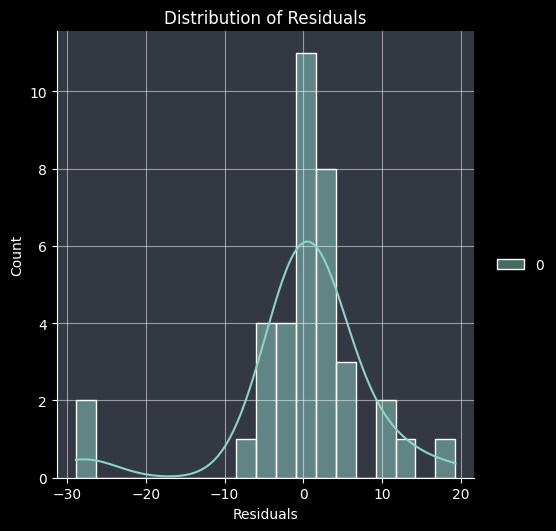

In [174]:
# Plotting the distribution of the residuals
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plotting the distribution of the residuals using seaborn's displot
sns.displot(residuals, kde=True)

# Adding a label to the x-axis
plt.xlabel('Residuals', color='white')

# Adding a title to the plot with white color
plt.title('Distribution of Residuals', color='white')

# Adding grid lines for better visualization
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Set the background color of the axes
plt.gca().patch.set_facecolor(paper_bgcolor)

# Displaying the plot
plt.show()


Upon observation, it is evident that the presence of outliers in the data hinders the residuals from conforming to a perfectly normal distribution. The presence of these outliers disrupts the symmetry and smoothness typically associated with a normal distribution. Consequently, the distribution of the residuals appears to deviate from normality. The impact of the outliers is visible in the tails of the distribution, where the frequency of occurrences differs from the expected pattern of a normal distribution.

In [175]:
# Calculating the mean of the residuals
mean_res = np.mean(residuals)

# Printing the mean of the residuals
print('The mean of the residuals:', mean_res)

The mean of the residuals: 0.2428767654239278


Upon calculating the mean of the residuals, it is observed that the value is close to zero. This finding aligns with one of the key assumptions of linear regression, which states that the mean of the residuals should ideally be zero.

The mean of the residuals represents the average discrepancy between the observed and predicted values. In our analysis, the close proximity of the mean of the residuals to zero suggests that, on average, the model is performing well in predicting the target variable.

When the mean of the residuals is approximately zero, it indicates that the model is unbiased and achieves a balance between overestimation and underestimation. A mean close to zero suggests that, on average, the residuals are evenly distributed around the true values, without any systematic bias.

By satisfying this assumption, our linear regression model demonstrates an unbiased estimation of the target variable. This contributes to the reliability and validity of the model's predictions, enabling us to make accurate inferences based on the analysis.

#**Conclusion**



*   A careful examination of the data reveals a pronounced decline in the stock prices of Yes Bank following the exposure of the Rana Kapoor fraud in 2018.

*   The dataset exhibited exceptional cleanliness, devoid of any missing values or duplicated rows, minimizing the need for extensive data wrangling.


*   Although outliers were present in the features, effective outlier mitigation was achieved through the implementation of a log transformation across all features

*   The log transformation successfully addressed positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.


*   Strong positive correlations were observed between the independent variables (Open, High, Low) and the dependent variable (Close), implying a high predictive potential of the dependent variable based on the independent variables.

*   The presence of positive correlations among the independent variables suggested the presence of multicollinearity; however, given the limited dataset size, feature removal was deemed unnecessary.

*  Among the various implemented regression models, the Ridge Regression model, combined with GridSearchCV for hyperparameter optimization, emerged as the preferred choice. It achieved a commendable performance, boasting an RMSE of 8.3824 and an R-2 score of 0.9938.

*   Notably, the 'High' and 'Low' features demonstrated positive weights, indicating a favorable impact on the predictions. Conversely, the 'Open' feature displayed a negative weight, signifying a detrimental influence on the predictions.

*   Satisfactorily meeting the assumptions of homoscedasticity, absence of autocorrelation, and a mean of zero, the residuals bolstered the reliability of the regression model.


*   The robustness of the conclusions was supported by a thorough exploration of the data, leaving little room for ambiguity.



*   The observed decline in Yes Bank's stock prices following the Rana Kapoor fraud exposure underscored the substantial impact of such events on the financial market.


*   The meticulous data cleaning process instilled confidence in the dataset's integrity, fostering accurate and reliable analyses.

*   Employing an appropriate transformation technique mitigated the influence of outliers, ensuring a more accurate representation of the data.
*   Addressing positive skewness through a log transformation enhanced the conformity of the data to the assumptions of linear regression models.

*   The strong positive correlations between the independent and dependent variables bolstered the predictive power of the regression models

*   Careful consideration of multicollinearity, despite its presence, deemed feature removal unnecessary, given the limited dataset size.
*   The selection of Ridge Regression with GridSearchCV as the final prediction model was substantiated by its exceptional performance, as demonstrated by the low RMSE and high R-2 score.





















#***Thank you!!!***